In [2]:
# Master File for Offline Studies on Muon System LLP Decays (sans clustering)

# Coders: Nathan Suri, Caltech; Cristian Pena, Caltech/Fermilab
# Date: July 2019
# LPC LLP Group

# Description
# Meant for testing WH

# Action Plan
#

# Notes/Conclusions
# @nasurijr: Barrel acceptance (theoretical rationale, data supports acceptance trend)

In [3]:
# User specifics
# Setups pwd location for data files and imports of special ROOT utilities

work_location = input("Username: ")
if work_location == 'nasurijr':
    pwd = '/nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/'
    
    # Sets display width
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:85% !important; }</style>"))
    
# elif work_location == '<Insert Tier2 username here>':
#     pwd = '/home/cms/delayed_jet_analyzer/'

Username: nasurijr


# Imports

In [4]:
# Imports necessary utilities and modules

import ROOT as rt
import root_numpy as rtnp
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

# Graph/histo utilities from ROOT
# Contained within the delayed_jet_analyzer repository
import sys
sys.path.append(pwd+'lib')
from histo_utilities import create_TH1D, create_TH2D, create_TGraph, std_color_list

# Used for extracting the TTree structure from each datafile
import os
import uproot

donotdelete = []

# Read in and Extract TTrees from Datafiles

In [269]:
# Setups dictionaries for storing data from MC/data ntuples
fpath = {}
tree = {}
NEvents = {}

data_path = pwd+'data/'

# Background Samples

# ggH-comparable background: QCD
fpath['qcd'] = data_path +'jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root'

# Currently not needed for the analysis
# # Small subset of B samples for quick runs/tests
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018B_112_dec.root'
# # # Complete set of A and B ZeroBias samples (time-intensive to run)
# fpath['zeroBias'] = data_path + 'jet_timing_studies_ZeroBias_Run2018AB_complete.root'

# WH-comparable background: WJetsToLNu
# # Small subset of WJetstoLNu (run interactively on jet_timing_studies)
# fpath['WJetsToLNu'] = data_path + 'jet_timing_studies_ntuple_RunIIFall17DRPremix_WJetsToLNu_TuneCP5_13TeV_setQ5_1.root'
# # Complete set run via CRAB on llp_ntupler
fpath['WJetsToLNu'] = data_path + 'WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root'


################################################################

# Signal Samples

# WH: bbbb
# mH = 125 GeV, mX = 15 GeV, ctau = 10 m
fpath['m15ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 40 GeV, ctau = 10 m
fpath['m40ct10000mm'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wminus
fpath['m55ct10000mm_minus'] = data_path + 'WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root'

# mH = 125 GeV, mX = 55 GeV, ctau = 10 m, Wplus
fpath['m55ct10000mm_plus'] = data_path + 'WplusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root'

# # WH: MET+bb
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path + 'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl1000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh125_mx50_pl10000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl1000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'ntuple_RunIISummer16_bbmet_vh_mh2000_mx975_pl10000.root'

# ggH
# # mH = 125 GeV, mX = 50 GeV, ctau = 1 m
# fpath['m50ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl1000_ev100000.root'

# # mH = 125 GeV, mX = 50 GeV, ctau = 10 m
# fpath['m50ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh125_mx50_pl10000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 1 m
# fpath['m975ct1000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl1000_ev100000.root'

# # mH = 2000 GeV, mX = 975 GeV, ctau = 10 m
# fpath['m975ct10000mm'] = data_path+'jet_timing_studies_ntuple_metbb_ggh_ISR_mh2000_mx975_pl10000_ev100000.root'

# Iterates through each file and extracts the ROOT TTree structure from each
for k,v in fpath.items():
    print(str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    print(k, v)
    root_dir = uproot.open(v) 
    tree[k] = root_dir['ntuples']['llp']
    NEvents[k] = root_dir['ntuples']['NEvents'][1]
    # Accesses the array form of the jetPt branch
#     a = tree[k]["jetPt"].array()
#     print(a[:-1][0])

2019-08-05 21:48:50.971864-07:00
qcd /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/jet_timing_studies_ntuple_RunIIFall17DRPremix_QCD_Pt_170to300_TuneCP5_13TeV_pythia8_1.root
2019-08-05 21:48:51.131208-07:00
WJetsToLNu /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WJetsToLNu_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8.root
2019-08-05 21:48:54.191763-07:00
m15ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-15_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-05 21:48:54.401924-07:00
m40ct10000mm /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-40_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-05 21:48:54.593611-07:00
m55ct10000mm_minus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WminusH_HToSSTobbbb_WToLNu_MH-125_MS-55_ctauS-10000_TuneCUETP8M1_13TeV.root
2019-08-05 21:48:54.785952-07:00
m55ct10000mm_plus /nfshome/nasurijr/LLP_analysis/delayed_jet_analyzer/data/WplusH_

## Name TTree Objects

In [270]:
# Bookkeeping: Defines the TTrees from the read datafiles
# Names displayed in README.md table

T_m15_ct10 = tree['m15ct10000mm']
T_wjets = tree['WJetsToLNu']
# T_minBias = tree['zeroBias']
T_m40_ct10 = tree['m40ct10000mm']
T_m55_ct10_minus = tree['m55ct10000mm_minus']
T_m55_ct10_plus = tree['m55ct10000mm_plus']

# T_wh = tree['wh_m50ct1000mm']
# T_bkg = tree['WJetsToLNu']

## Jet Pt Calculations

In [271]:
#get first jet pt per event
first_jet_pt = [x[0] if len(x) else -1 for x in T_m15_ct10['jetPt'].array()]

#get max jet pt per event
max_jet_pt = [np.max(np.abs(x)) if len(x) else -1 for x in T_m15_ct10['gLLP_decay_vertex_z'].array()]

#store jet-pt array per event in a list
first_jet_pt_arr = []
for x in T_m15_ct10['jetPt'].array():
    if len(x) == 0:
        break
    first_jet_pt_arr.append(x[0])

# Define Variables and Name Datafiles 

In [272]:
# Variable Definitions
# Creates dictionaries for variables to be analyzed
# The dictionaries will contain the variable arrays for each datafile with a relevant key

# Boolean selections
sel_bool = {}

# CSC
nCsc = {}
csc_z = {}
csc_x = {}
csc_y = {}
csc_eta = {}
csc_phi = {}
csc_t = {}

# Gen Level
# gLLP_eta = {}
gLLP_r_0 = {}
gLLP_r_1 = {}
gLLP_decay_0 = {}
gLLP_decay_1 = {}

# Reco level
met_pt = {}
eventNum = {}
lumiNum = {}

In [274]:
# Bookkeeping: Creates a dictionary for iterating over all of the datafiles and 
#              converting the relevant branches to numpy arrays
# Names displayed in README.md table

# data_trees = {'m50ct1m': T, 'qcd': T_bkg, 'zeroBias':T_minBias, 'm50ct10m': T_low_ctau10, 'm975ct1m': T_high_ctau1, 'm975ct10m': T_high_ctau10, 'wh_m50ct1m': T_wh, 'WJetsToLNu': T_w_bkg}
data_trees = {'m15ct10m_wh_bbbb': T_m15_ct10, 'm40ct10m_wh_bbbb': T_m40_ct10, 'm55ct10m_wh_bbbb_minus': T_m55_ct10_minus, 'm55ct10m_wh_bbbb_plus': T_m55_ct10_plus, 'WJetsToLNu': T_wjets}

# Event Selection

In [275]:
# print(T_bkg['nCsc'].array())

# # for ev in range(len(T_wh['nCsc'].array())):
# gParticleMotherId = T_wh['gParticleMotherId'].array()
# gParticleId = T_wh['gParticleId'].array()
# gParticleStatus = T_wh['gParticleStatus'].array()
# # print(gParticleId)
# counter = 0
# # print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24)))
# ele_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# mu_sel = np.logical_and(np.logical_and(np.absolute(gParticleId) == 11, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 )
# for ev in np.logical_or(ele_sel, mu_sel):
#     if ev.any():
#         counter +=1
# print(counter)
# print(len(gParticleId))
# print(np.logical_and(np.logical_and(np.absolute(gParticleId) == 13, np.absolute(gParticleMotherId) == 24), gParticleStatus == 1 ))

## TBranch -> np.array() Conversion

In [276]:
# Event Selection

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    if 'wh' in species:
        ele_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 13, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        mu_sel = np.logical_and(np.logical_and(np.absolute(arbor['gParticleId'].array()) == 11, np.absolute(arbor['gParticleMotherId'].array()) == 24), arbor['gParticleStatus'].array() == 1)
        sel_lepton = []
        time_counter = 0
        for ev in np.logical_or(ele_sel, mu_sel):
            time_counter += 1
            if (time_counter % 100000) == 0:
                print(str(time_counter) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
            if ev.any():
                sel_lepton.append(True)
            else:
                sel_lepton.append(False)
                
    if 'wh' not in species:
        sel_lepton = np.ones(len(arbor), dtype=bool)
                
    if 'metbb' in species or 'bbmet' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_decay_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2 + (arbor['gLLP_decay_vertex_z'].array()[:,0])**2)

        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_signal = np.logical_and(sel_dis_1, sel_lepton)
        sel_bool[species] = sel_signal 
        
    if 'bbbb' in species:
        gLLP_r_0[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,0])**2+(arbor['gLLP_decay_vertex_y'].array()[:,0])**2)
        gLLP_r_1[species] = np.sqrt((arbor['gLLP_decay_vertex_x'].array()[:,1])**2+(arbor['gLLP_decay_vertex_y'].array()[:,1])**2)

        
        sel_dis_0 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,0]) < 1100)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])<2.4)
#         sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(arbor['gLLP_eta'].array()[:,0])>0.9)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])<695.5)
        sel_dis_0 = np.logical_and(sel_dis_0, np.absolute(gLLP_r_0[species])>100)
        
        sel_dis_1 = np.logical_and(np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) > 568 , np.absolute(arbor['gLLP_decay_vertex_z'].array()[:,1]) < 1100)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])<2.4)
#         sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(arbor['gLLP_eta'].array()[:,1])>0.9)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])<695.5)
        sel_dis_1 = np.logical_and(sel_dis_1, np.absolute(gLLP_r_1[species])>100)
        
        sel_signal = np.logical_or(sel_dis_0, sel_dis_1)
        sel_signal = np.logical_and(sel_signal, sel_lepton)
        sel_bool[species] = sel_signal 
        
    else:
#         sel_bkg = [True if np.any(x > 50) else False for x in arbor['jetPt'].array()]
#         sel_bkg = np.logical_and(sel_bkg, sel_lepton)
#         sel_bool[species] = sel_bkg
        sel_bool[species] = np.ones(len(arbor['nCsc'].array()), dtype=bool)
        
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-05 21:50:53.183577-07:00
m15ct10m_wh_bbbb: 2019-08-05 21:50:53.897727-07:00
m40ct10m_wh_bbbb: 2019-08-05 21:50:54.625453-07:00
m55ct10m_wh_bbbb_minus: 2019-08-05 21:50:55.349360-07:00
m55ct10m_wh_bbbb_plus: 2019-08-05 21:50:56.081549-07:00
WJetsToLNu: 2019-08-05 21:50:57.955836-07:00


In [277]:
print(sel_bool)
print(data_trees)

{'m15ct10m_wh_bbbb': array([False, False, False, ..., False, False, False]), 'm40ct10m_wh_bbbb': array([False, False, False, ..., False, False, False]), 'm55ct10m_wh_bbbb_minus': array([False, False, False, ..., False, False, False]), 'm55ct10m_wh_bbbb_plus': array([False, False, False, ..., False, False, False]), 'WJetsToLNu': array([ True,  True,  True, ...,  True,  True,  True])}
{'m15ct10m_wh_bbbb': <TTree b'llp' at 0x7fbfcc342898>, 'm40ct10m_wh_bbbb': <TTree b'llp' at 0x7fbfb5c63320>, 'm55ct10m_wh_bbbb_minus': <TTree b'llp' at 0x7fbfa86bf080>, 'm55ct10m_wh_bbbb_plus': <TTree b'llp' at 0x7fbf9acc4ef0>, 'WJetsToLNu': <TTree b'llp' at 0x7fbfcc3b7f60>}


In [278]:
# Application of event selection to variables

print('Start: ' + str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

for species, arbor in data_trees.items():
    # Endcap: CSCs
    nCsc[species] = arbor['nCsc'].array()[sel_bool[species]]
    csc_z[species] = arbor['cscZ'].array()[sel_bool[species]]
    csc_x[species] = arbor['cscX'].array()[sel_bool[species]]
    csc_y[species] = arbor['cscY'].array()[sel_bool[species]]
    csc_t[species] = arbor['cscT'].array()[sel_bool[species]]
    csc_eta[species] = arbor['cscEta'].array()[sel_bool[species]]
    csc_phi[species] = arbor['cscPhi'].array()[sel_bool[species]]

    # Gen-level
    eventNum[species] = arbor['eventNum'].array()[sel_bool[species]]
    lumiNum[species] = arbor['lumiNum'].array()[sel_bool[species]]
    met_pt[species] = arbor['metType1Pt'].array()[sel_bool[species]]
    
    print(species + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-05 21:51:05.561149-07:00
m15ct10m_wh_bbbb: 2019-08-05 21:51:05.660806-07:00
m40ct10m_wh_bbbb: 2019-08-05 21:51:05.778360-07:00
m55ct10m_wh_bbbb_minus: 2019-08-05 21:51:05.904304-07:00
m55ct10m_wh_bbbb_plus: 2019-08-05 21:51:06.033468-07:00
WJetsToLNu: 2019-08-05 21:51:59.601624-07:00


In [282]:
nCsc['m55ct10m_wh_bbbb'] = np.concatenate([nCsc['m55ct10m_wh_bbbb_minus'], nCsc['m55ct10m_wh_bbbb_plus']])
csc_z['m55ct10m_wh_bbbb'] = np.concatenate([csc_z['m55ct10m_wh_bbbb_minus'], csc_z['m55ct10m_wh_bbbb_plus']])
csc_x['m55ct10m_wh_bbbb'] = np.concatenate([csc_x['m55ct10m_wh_bbbb_minus'], csc_x['m55ct10m_wh_bbbb_plus']])
csc_y['m55ct10m_wh_bbbb'] = np.concatenate([csc_y['m55ct10m_wh_bbbb_minus'], csc_y['m55ct10m_wh_bbbb_plus']])
csc_t['m55ct10m_wh_bbbb'] = np.concatenate([csc_t['m55ct10m_wh_bbbb_minus'], csc_t['m55ct10m_wh_bbbb_plus']])
csc_eta['m55ct10m_wh_bbbb'] = np.concatenate([csc_eta['m55ct10m_wh_bbbb_minus'], csc_eta['m55ct10m_wh_bbbb_plus']])
csc_phi['m55ct10m_wh_bbbb'] = np.concatenate([csc_phi['m55ct10m_wh_bbbb_minus'], csc_phi['m55ct10m_wh_bbbb_plus']])
eventNum['m55ct10m_wh_bbbb'] = np.concatenate([eventNum['m55ct10m_wh_bbbb_minus'], eventNum['m55ct10m_wh_bbbb_plus']])
lumiNum['m55ct10m_wh_bbbb'] = np.concatenate([lumiNum['m55ct10m_wh_bbbb_minus'], lumiNum['m55ct10m_wh_bbbb_plus']])
met_pt['m55ct10m_wh_bbbb'] = np.concatenate([met_pt['m55ct10m_wh_bbbb_minus'], met_pt['m55ct10m_wh_bbbb_plus']])

## Endcap Hit Removal

In [283]:
# Hit Removal
# For both the endcap and barrel regions (overlap to be determined), the closest stations to the beamspot are the noisiest.
# Thus, we remove the hits that land in these stations for each event in each datafile.

# Endcap
nCsc_station = {}
nCsc_removal = {}

# Loops over every datafile
for files in data_trees.keys():
    # Endcap
    nCsc_station[files] = {}
    nCsc_station[files]['ME_11'] = []
    nCsc_station[files]['ME_12'] = []
    nCsc_station[files]['ME_13'] = []
    
    # Loops over every event in each datafile
    for pos_bool in range(len(csc_z[files])):
        csc_r = np.sqrt(csc_x[files][pos_bool]**2+csc_y[files][pos_bool]**2)
        z_pos_bool = csc_z[files][pos_bool]
        
        counter_me11 = 0
        counter_me12 = 0
        counter_me13 = 0
        
        # Loops over every hit in each event
        for z_ind in range(len(z_pos_bool)):
            z_bool = np.absolute(z_pos_bool[z_ind])
            # ME 1/1 Constraints
            if z_bool > 568 and z_bool < 632:
                counter_me11 += 1
                
            if z_bool > 663 and z_bool < 724:
                # ME 1/2 Constraints
                if csc_r[z_ind] < 465 and csc_r[z_ind] > 275:
                    counter_me12 += 1
                # ME 1/3 Constraints
                if csc_r[z_ind] < 695.5 and csc_r[z_ind] > 505.5:
                    counter_me13 += 1
                    
        nCsc_station[files]['ME_11'].append(counter_me11)
        nCsc_station[files]['ME_12'].append(counter_me12)
        nCsc_station[files]['ME_13'].append(counter_me13)
        
        if (pos_bool % 1000) == 0:
            print(str(pos_bool) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
    
    # nCsc dictionaries containing hits removed labelled by removed stations
    nCsc_removal[files] = {}
    nCsc_removal[files]['ME_11'] = np.array(nCsc[files]) - np.array(nCsc_station[files]['ME_11'])
    nCsc_removal[files]['ME_112'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']))
    nCsc_removal[files]['ME_1123'] = np.array(nCsc[files]) - (np.array(nCsc_station[files]['ME_11']) + np.array(nCsc_station[files]['ME_12']) + np.array(nCsc_station[files]['ME_13']))
    
    print(files + ': ' +str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

0: 2019-08-05 21:57:46.314929-07:00
m15ct10m_wh_bbbb: 2019-08-05 21:57:46.784477-07:00
0: 2019-08-05 21:57:46.784715-07:00
1000: 2019-08-05 21:57:47.414396-07:00
2000: 2019-08-05 21:57:48.013578-07:00
m40ct10m_wh_bbbb: 2019-08-05 21:57:48.114664-07:00
0: 2019-08-05 21:57:48.115901-07:00
1000: 2019-08-05 21:57:48.765943-07:00
2000: 2019-08-05 21:57:49.446864-07:00
m55ct10m_wh_bbbb_minus: 2019-08-05 21:57:49.848020-07:00
0: 2019-08-05 21:57:49.848547-07:00
1000: 2019-08-05 21:57:50.530693-07:00
2000: 2019-08-05 21:57:51.194306-07:00
m55ct10m_wh_bbbb_plus: 2019-08-05 21:57:51.473610-07:00
0: 2019-08-05 21:57:51.473784-07:00
1000: 2019-08-05 21:57:51.591773-07:00
2000: 2019-08-05 21:57:51.714759-07:00
3000: 2019-08-05 21:57:51.832357-07:00
4000: 2019-08-05 21:57:51.951616-07:00
5000: 2019-08-05 21:57:52.072159-07:00
6000: 2019-08-05 21:57:52.190480-07:00
7000: 2019-08-05 21:57:52.313367-07:00
8000: 2019-08-05 21:57:52.432691-07:00
9000: 2019-08-05 21:57:52.552246-07:00
10000: 2019-08-05 21

189000: 2019-08-05 21:58:14.341338-07:00
190000: 2019-08-05 21:58:14.460321-07:00
191000: 2019-08-05 21:58:14.584567-07:00
192000: 2019-08-05 21:58:14.706145-07:00
193000: 2019-08-05 21:58:14.824586-07:00
194000: 2019-08-05 21:58:14.943300-07:00
195000: 2019-08-05 21:58:15.060810-07:00
196000: 2019-08-05 21:58:15.184835-07:00
197000: 2019-08-05 21:58:15.307403-07:00
198000: 2019-08-05 21:58:15.430042-07:00
199000: 2019-08-05 21:58:15.548043-07:00
200000: 2019-08-05 21:58:15.671082-07:00
201000: 2019-08-05 21:58:15.794168-07:00
202000: 2019-08-05 21:58:15.914670-07:00
203000: 2019-08-05 21:58:16.037924-07:00
204000: 2019-08-05 21:58:16.159314-07:00
205000: 2019-08-05 21:58:16.281778-07:00
206000: 2019-08-05 21:58:16.402622-07:00
207000: 2019-08-05 21:58:16.524327-07:00
208000: 2019-08-05 21:58:16.644476-07:00
209000: 2019-08-05 21:58:16.767666-07:00
210000: 2019-08-05 21:58:16.891366-07:00
211000: 2019-08-05 21:58:17.009941-07:00
212000: 2019-08-05 21:58:17.127926-07:00
213000: 2019-08-

389000: 2019-08-05 21:58:38.606827-07:00
390000: 2019-08-05 21:58:38.727271-07:00
391000: 2019-08-05 21:58:38.848234-07:00
392000: 2019-08-05 21:58:38.968584-07:00
393000: 2019-08-05 21:58:39.089185-07:00
394000: 2019-08-05 21:58:39.211180-07:00
395000: 2019-08-05 21:58:39.329213-07:00
396000: 2019-08-05 21:58:39.449392-07:00
397000: 2019-08-05 21:58:39.568177-07:00
398000: 2019-08-05 21:58:39.692439-07:00
399000: 2019-08-05 21:58:39.812294-07:00
400000: 2019-08-05 21:58:39.929244-07:00
401000: 2019-08-05 21:58:40.042338-07:00
402000: 2019-08-05 21:58:40.164165-07:00
403000: 2019-08-05 21:58:40.285227-07:00
404000: 2019-08-05 21:58:40.404188-07:00
405000: 2019-08-05 21:58:40.524667-07:00
406000: 2019-08-05 21:58:40.643337-07:00
407000: 2019-08-05 21:58:40.768115-07:00
408000: 2019-08-05 21:58:40.887363-07:00
409000: 2019-08-05 21:58:41.009415-07:00
410000: 2019-08-05 21:58:41.135322-07:00
411000: 2019-08-05 21:58:41.256664-07:00
412000: 2019-08-05 21:58:41.381263-07:00
413000: 2019-08-

589000: 2019-08-05 21:59:02.767008-07:00
590000: 2019-08-05 21:59:02.887664-07:00
591000: 2019-08-05 21:59:03.005393-07:00
592000: 2019-08-05 21:59:03.120617-07:00
593000: 2019-08-05 21:59:03.239492-07:00
594000: 2019-08-05 21:59:03.358392-07:00
595000: 2019-08-05 21:59:03.475259-07:00
596000: 2019-08-05 21:59:03.596045-07:00
597000: 2019-08-05 21:59:03.717930-07:00
598000: 2019-08-05 21:59:03.842179-07:00
599000: 2019-08-05 21:59:03.962092-07:00
600000: 2019-08-05 21:59:04.084666-07:00
601000: 2019-08-05 21:59:04.205160-07:00
602000: 2019-08-05 21:59:04.325076-07:00
603000: 2019-08-05 21:59:04.446764-07:00
604000: 2019-08-05 21:59:04.567370-07:00
605000: 2019-08-05 21:59:04.689119-07:00
606000: 2019-08-05 21:59:04.809374-07:00
607000: 2019-08-05 21:59:04.930433-07:00
608000: 2019-08-05 21:59:05.049890-07:00
609000: 2019-08-05 21:59:05.172865-07:00
610000: 2019-08-05 21:59:05.295473-07:00
611000: 2019-08-05 21:59:05.415637-07:00
612000: 2019-08-05 21:59:05.532895-07:00
613000: 2019-08-

790000: 2019-08-05 21:59:27.134425-07:00
791000: 2019-08-05 21:59:27.255670-07:00
792000: 2019-08-05 21:59:27.377390-07:00
793000: 2019-08-05 21:59:27.495971-07:00
794000: 2019-08-05 21:59:27.621793-07:00
795000: 2019-08-05 21:59:27.739129-07:00
796000: 2019-08-05 21:59:27.857978-07:00
797000: 2019-08-05 21:59:27.976387-07:00
798000: 2019-08-05 21:59:28.094458-07:00
799000: 2019-08-05 21:59:28.214851-07:00
800000: 2019-08-05 21:59:28.335181-07:00
801000: 2019-08-05 21:59:28.456226-07:00
802000: 2019-08-05 21:59:28.573862-07:00
803000: 2019-08-05 21:59:28.696493-07:00
804000: 2019-08-05 21:59:28.819011-07:00
805000: 2019-08-05 21:59:28.940893-07:00
806000: 2019-08-05 21:59:29.066083-07:00
807000: 2019-08-05 21:59:29.179935-07:00
808000: 2019-08-05 21:59:29.303672-07:00
809000: 2019-08-05 21:59:29.426093-07:00
810000: 2019-08-05 21:59:29.547443-07:00
811000: 2019-08-05 21:59:29.665776-07:00
812000: 2019-08-05 21:59:29.784167-07:00
813000: 2019-08-05 21:59:29.907862-07:00
814000: 2019-08-

990000: 2019-08-05 21:59:51.393152-07:00
991000: 2019-08-05 21:59:51.513140-07:00
992000: 2019-08-05 21:59:51.635722-07:00
993000: 2019-08-05 21:59:51.753676-07:00
994000: 2019-08-05 21:59:51.872622-07:00
995000: 2019-08-05 21:59:51.989223-07:00
996000: 2019-08-05 21:59:52.112890-07:00
997000: 2019-08-05 21:59:52.235398-07:00
998000: 2019-08-05 21:59:52.356044-07:00
999000: 2019-08-05 21:59:52.477187-07:00
1000000: 2019-08-05 21:59:52.602819-07:00
1001000: 2019-08-05 21:59:52.723956-07:00
1002000: 2019-08-05 21:59:52.845709-07:00
1003000: 2019-08-05 21:59:52.965616-07:00
1004000: 2019-08-05 21:59:53.085614-07:00
1005000: 2019-08-05 21:59:53.212118-07:00
1006000: 2019-08-05 21:59:53.335031-07:00
1007000: 2019-08-05 21:59:53.457935-07:00
1008000: 2019-08-05 21:59:53.580698-07:00
1009000: 2019-08-05 21:59:53.702844-07:00
1010000: 2019-08-05 21:59:53.828331-07:00
1011000: 2019-08-05 21:59:53.952866-07:00
1012000: 2019-08-05 21:59:54.076382-07:00
1013000: 2019-08-05 21:59:54.200053-07:00
10

1186000: 2019-08-05 22:00:15.322467-07:00
1187000: 2019-08-05 22:00:15.441504-07:00
1188000: 2019-08-05 22:00:15.565437-07:00
1189000: 2019-08-05 22:00:15.682756-07:00
1190000: 2019-08-05 22:00:15.800663-07:00
1191000: 2019-08-05 22:00:15.924895-07:00
1192000: 2019-08-05 22:00:16.044576-07:00
1193000: 2019-08-05 22:00:16.167264-07:00
1194000: 2019-08-05 22:00:16.287466-07:00
1195000: 2019-08-05 22:00:16.408357-07:00
1196000: 2019-08-05 22:00:16.528061-07:00
1197000: 2019-08-05 22:00:16.649679-07:00
1198000: 2019-08-05 22:00:16.770966-07:00
1199000: 2019-08-05 22:00:16.891654-07:00
1200000: 2019-08-05 22:00:17.011250-07:00
1201000: 2019-08-05 22:00:17.128010-07:00
1202000: 2019-08-05 22:00:17.244947-07:00
1203000: 2019-08-05 22:00:17.367601-07:00
1204000: 2019-08-05 22:00:17.490617-07:00
1205000: 2019-08-05 22:00:17.608931-07:00
1206000: 2019-08-05 22:00:17.727056-07:00
1207000: 2019-08-05 22:00:17.847214-07:00
1208000: 2019-08-05 22:00:17.966414-07:00
1209000: 2019-08-05 22:00:18.08647

1382000: 2019-08-05 22:00:38.984648-07:00
1383000: 2019-08-05 22:00:39.109393-07:00
1384000: 2019-08-05 22:00:39.228630-07:00
1385000: 2019-08-05 22:00:39.352904-07:00
1386000: 2019-08-05 22:00:39.469105-07:00
1387000: 2019-08-05 22:00:39.590939-07:00
1388000: 2019-08-05 22:00:39.709917-07:00
1389000: 2019-08-05 22:00:39.832129-07:00
1390000: 2019-08-05 22:00:39.958079-07:00
1391000: 2019-08-05 22:00:40.079641-07:00
1392000: 2019-08-05 22:00:40.200031-07:00
1393000: 2019-08-05 22:00:40.320180-07:00
1394000: 2019-08-05 22:00:40.439877-07:00
1395000: 2019-08-05 22:00:40.583090-07:00
1396000: 2019-08-05 22:00:40.706728-07:00
1397000: 2019-08-05 22:00:40.826871-07:00
1398000: 2019-08-05 22:00:40.947542-07:00
1399000: 2019-08-05 22:00:41.064783-07:00
1400000: 2019-08-05 22:00:41.184522-07:00
1401000: 2019-08-05 22:00:41.304941-07:00
1402000: 2019-08-05 22:00:41.427346-07:00
1403000: 2019-08-05 22:00:41.549237-07:00
1404000: 2019-08-05 22:00:41.672057-07:00
1405000: 2019-08-05 22:00:41.79343

1580000: 2019-08-05 22:01:02.935525-07:00
1581000: 2019-08-05 22:01:03.054491-07:00
1582000: 2019-08-05 22:01:03.179592-07:00
1583000: 2019-08-05 22:01:03.301030-07:00
1584000: 2019-08-05 22:01:03.423434-07:00
1585000: 2019-08-05 22:01:03.543731-07:00
1586000: 2019-08-05 22:01:03.664626-07:00
1587000: 2019-08-05 22:01:03.787879-07:00
1588000: 2019-08-05 22:01:03.906982-07:00
1589000: 2019-08-05 22:01:04.028678-07:00
1590000: 2019-08-05 22:01:04.152138-07:00
1591000: 2019-08-05 22:01:04.275688-07:00
1592000: 2019-08-05 22:01:04.393503-07:00
1593000: 2019-08-05 22:01:04.511309-07:00
1594000: 2019-08-05 22:01:04.635379-07:00
1595000: 2019-08-05 22:01:04.756894-07:00
1596000: 2019-08-05 22:01:04.878466-07:00
1597000: 2019-08-05 22:01:05.001150-07:00
1598000: 2019-08-05 22:01:05.122068-07:00
1599000: 2019-08-05 22:01:05.241572-07:00
1600000: 2019-08-05 22:01:05.366054-07:00
1601000: 2019-08-05 22:01:05.486006-07:00
1602000: 2019-08-05 22:01:05.606949-07:00
1603000: 2019-08-05 22:01:05.72672

1778000: 2019-08-05 22:01:26.874483-07:00
1779000: 2019-08-05 22:01:26.994633-07:00
1780000: 2019-08-05 22:01:27.116419-07:00
1781000: 2019-08-05 22:01:27.237683-07:00
1782000: 2019-08-05 22:01:27.359098-07:00
1783000: 2019-08-05 22:01:27.477306-07:00
1784000: 2019-08-05 22:01:27.596466-07:00
1785000: 2019-08-05 22:01:27.719127-07:00
1786000: 2019-08-05 22:01:27.837180-07:00
1787000: 2019-08-05 22:01:27.953717-07:00
1788000: 2019-08-05 22:01:28.083564-07:00
1789000: 2019-08-05 22:01:28.204174-07:00
1790000: 2019-08-05 22:01:28.327808-07:00
1791000: 2019-08-05 22:01:28.445968-07:00
1792000: 2019-08-05 22:01:28.565286-07:00
1793000: 2019-08-05 22:01:28.688356-07:00
1794000: 2019-08-05 22:01:28.807801-07:00
1795000: 2019-08-05 22:01:28.932457-07:00
1796000: 2019-08-05 22:01:29.049868-07:00
1797000: 2019-08-05 22:01:29.169946-07:00
1798000: 2019-08-05 22:01:29.288919-07:00
1799000: 2019-08-05 22:01:29.409728-07:00
1800000: 2019-08-05 22:01:29.527796-07:00
1801000: 2019-08-05 22:01:29.64610

1975000: 2019-08-05 22:01:50.776648-07:00
1976000: 2019-08-05 22:01:50.899941-07:00
1977000: 2019-08-05 22:01:51.023621-07:00
1978000: 2019-08-05 22:01:51.143301-07:00
1979000: 2019-08-05 22:01:51.259623-07:00
1980000: 2019-08-05 22:01:51.378384-07:00
1981000: 2019-08-05 22:01:51.497616-07:00
1982000: 2019-08-05 22:01:51.621281-07:00
1983000: 2019-08-05 22:01:51.741281-07:00
1984000: 2019-08-05 22:01:51.863048-07:00
1985000: 2019-08-05 22:01:51.983079-07:00
1986000: 2019-08-05 22:01:52.103253-07:00
1987000: 2019-08-05 22:01:52.225761-07:00
1988000: 2019-08-05 22:01:52.346731-07:00
1989000: 2019-08-05 22:01:52.464575-07:00
1990000: 2019-08-05 22:01:52.583907-07:00
1991000: 2019-08-05 22:01:52.704735-07:00
1992000: 2019-08-05 22:01:52.827076-07:00
1993000: 2019-08-05 22:01:52.945152-07:00
1994000: 2019-08-05 22:01:53.068709-07:00
1995000: 2019-08-05 22:01:53.189901-07:00
1996000: 2019-08-05 22:01:53.307520-07:00
1997000: 2019-08-05 22:01:53.440597-07:00
1998000: 2019-08-05 22:01:53.56134

2172000: 2019-08-05 22:02:14.637521-07:00
2173000: 2019-08-05 22:02:14.755323-07:00
2174000: 2019-08-05 22:02:14.873816-07:00
2175000: 2019-08-05 22:02:14.996957-07:00
2176000: 2019-08-05 22:02:15.116872-07:00
2177000: 2019-08-05 22:02:15.242370-07:00
2178000: 2019-08-05 22:02:15.365558-07:00
2179000: 2019-08-05 22:02:15.484116-07:00
2180000: 2019-08-05 22:02:15.609061-07:00
2181000: 2019-08-05 22:02:15.727789-07:00
2182000: 2019-08-05 22:02:15.845695-07:00
2183000: 2019-08-05 22:02:15.969916-07:00
2184000: 2019-08-05 22:02:16.092230-07:00
2185000: 2019-08-05 22:02:16.213217-07:00
2186000: 2019-08-05 22:02:16.338233-07:00
2187000: 2019-08-05 22:02:16.457318-07:00
2188000: 2019-08-05 22:02:16.581621-07:00
2189000: 2019-08-05 22:02:16.703771-07:00
2190000: 2019-08-05 22:02:16.824042-07:00
2191000: 2019-08-05 22:02:16.947244-07:00
2192000: 2019-08-05 22:02:17.064718-07:00
2193000: 2019-08-05 22:02:17.186137-07:00
2194000: 2019-08-05 22:02:17.306643-07:00
2195000: 2019-08-05 22:02:17.43069

2370000: 2019-08-05 22:02:38.697719-07:00
2371000: 2019-08-05 22:02:38.817769-07:00
2372000: 2019-08-05 22:02:38.934980-07:00
2373000: 2019-08-05 22:02:39.061697-07:00
2374000: 2019-08-05 22:02:39.183791-07:00
2375000: 2019-08-05 22:02:39.302971-07:00
2376000: 2019-08-05 22:02:39.420214-07:00
2377000: 2019-08-05 22:02:39.543879-07:00
2378000: 2019-08-05 22:02:39.662745-07:00
2379000: 2019-08-05 22:02:39.783917-07:00
2380000: 2019-08-05 22:02:39.904404-07:00
2381000: 2019-08-05 22:02:40.024976-07:00
2382000: 2019-08-05 22:02:40.143019-07:00
2383000: 2019-08-05 22:02:40.263041-07:00
2384000: 2019-08-05 22:02:40.380935-07:00
2385000: 2019-08-05 22:02:40.506756-07:00
2386000: 2019-08-05 22:02:40.652063-07:00
2387000: 2019-08-05 22:02:40.772294-07:00
2388000: 2019-08-05 22:02:40.892298-07:00
2389000: 2019-08-05 22:02:41.016074-07:00
2390000: 2019-08-05 22:02:41.138055-07:00
2391000: 2019-08-05 22:02:41.260256-07:00
2392000: 2019-08-05 22:02:41.379992-07:00
2393000: 2019-08-05 22:02:41.49746

2566000: 2019-08-05 22:03:02.425111-07:00
2567000: 2019-08-05 22:03:02.547138-07:00
2568000: 2019-08-05 22:03:02.667174-07:00
2569000: 2019-08-05 22:03:02.787529-07:00
2570000: 2019-08-05 22:03:02.907188-07:00
2571000: 2019-08-05 22:03:03.026387-07:00
2572000: 2019-08-05 22:03:03.145695-07:00
2573000: 2019-08-05 22:03:03.267395-07:00
2574000: 2019-08-05 22:03:03.388303-07:00
2575000: 2019-08-05 22:03:03.510394-07:00
2576000: 2019-08-05 22:03:03.633698-07:00
2577000: 2019-08-05 22:03:03.757156-07:00
2578000: 2019-08-05 22:03:03.881129-07:00
2579000: 2019-08-05 22:03:04.005037-07:00
2580000: 2019-08-05 22:03:04.121450-07:00
2581000: 2019-08-05 22:03:04.240446-07:00
2582000: 2019-08-05 22:03:04.364902-07:00
2583000: 2019-08-05 22:03:04.483570-07:00
2584000: 2019-08-05 22:03:04.603390-07:00
2585000: 2019-08-05 22:03:04.723702-07:00
2586000: 2019-08-05 22:03:04.843991-07:00
2587000: 2019-08-05 22:03:04.966396-07:00
2588000: 2019-08-05 22:03:05.083272-07:00
2589000: 2019-08-05 22:03:05.20740

2764000: 2019-08-05 22:03:26.421513-07:00
2765000: 2019-08-05 22:03:26.544189-07:00
2766000: 2019-08-05 22:03:26.665940-07:00
2767000: 2019-08-05 22:03:26.785268-07:00
2768000: 2019-08-05 22:03:26.903652-07:00
2769000: 2019-08-05 22:03:27.024212-07:00
2770000: 2019-08-05 22:03:27.144495-07:00
2771000: 2019-08-05 22:03:27.266775-07:00
2772000: 2019-08-05 22:03:27.384003-07:00
2773000: 2019-08-05 22:03:27.507018-07:00
2774000: 2019-08-05 22:03:27.626406-07:00
2775000: 2019-08-05 22:03:27.748837-07:00
2776000: 2019-08-05 22:03:27.874144-07:00
2777000: 2019-08-05 22:03:27.996351-07:00
2778000: 2019-08-05 22:03:28.115261-07:00
2779000: 2019-08-05 22:03:28.235271-07:00
2780000: 2019-08-05 22:03:28.354822-07:00
2781000: 2019-08-05 22:03:28.476520-07:00
2782000: 2019-08-05 22:03:28.603109-07:00
2783000: 2019-08-05 22:03:28.722683-07:00
2784000: 2019-08-05 22:03:28.844730-07:00
2785000: 2019-08-05 22:03:28.966923-07:00
2786000: 2019-08-05 22:03:29.087054-07:00
2787000: 2019-08-05 22:03:29.20812

2962000: 2019-08-05 22:03:50.356020-07:00
2963000: 2019-08-05 22:03:50.473309-07:00
2964000: 2019-08-05 22:03:50.595843-07:00
2965000: 2019-08-05 22:03:50.713589-07:00
2966000: 2019-08-05 22:03:50.831380-07:00
2967000: 2019-08-05 22:03:50.949879-07:00
2968000: 2019-08-05 22:03:51.070749-07:00
2969000: 2019-08-05 22:03:51.189455-07:00
2970000: 2019-08-05 22:03:51.311673-07:00
2971000: 2019-08-05 22:03:51.455693-07:00
2972000: 2019-08-05 22:03:51.655380-07:00
2973000: 2019-08-05 22:03:51.854617-07:00
2974000: 2019-08-05 22:03:52.058450-07:00
2975000: 2019-08-05 22:03:52.267522-07:00
2976000: 2019-08-05 22:03:52.476568-07:00
2977000: 2019-08-05 22:03:52.679113-07:00
2978000: 2019-08-05 22:03:52.801069-07:00
2979000: 2019-08-05 22:03:52.924737-07:00
2980000: 2019-08-05 22:03:53.046953-07:00
2981000: 2019-08-05 22:03:53.165207-07:00
2982000: 2019-08-05 22:03:53.284125-07:00
2983000: 2019-08-05 22:03:53.408322-07:00
2984000: 2019-08-05 22:03:53.530516-07:00
2985000: 2019-08-05 22:03:53.64677

3159000: 2019-08-05 22:04:14.720943-07:00
3160000: 2019-08-05 22:04:14.839823-07:00
3161000: 2019-08-05 22:04:14.957691-07:00
3162000: 2019-08-05 22:04:15.080004-07:00
3163000: 2019-08-05 22:04:15.204318-07:00
3164000: 2019-08-05 22:04:15.322653-07:00
3165000: 2019-08-05 22:04:15.445918-07:00
3166000: 2019-08-05 22:04:15.566384-07:00
3167000: 2019-08-05 22:04:15.686222-07:00
3168000: 2019-08-05 22:04:15.809047-07:00
3169000: 2019-08-05 22:04:15.932292-07:00
3170000: 2019-08-05 22:04:16.050456-07:00
3171000: 2019-08-05 22:04:16.173017-07:00
3172000: 2019-08-05 22:04:16.297553-07:00
3173000: 2019-08-05 22:04:16.419352-07:00
3174000: 2019-08-05 22:04:16.539082-07:00
3175000: 2019-08-05 22:04:16.661480-07:00
3176000: 2019-08-05 22:04:16.782976-07:00
3177000: 2019-08-05 22:04:16.901820-07:00
3178000: 2019-08-05 22:04:17.023295-07:00
3179000: 2019-08-05 22:04:17.143146-07:00
3180000: 2019-08-05 22:04:17.262983-07:00
3181000: 2019-08-05 22:04:17.381769-07:00
3182000: 2019-08-05 22:04:17.49897

3355000: 2019-08-05 22:04:38.411949-07:00
3356000: 2019-08-05 22:04:38.530705-07:00
3357000: 2019-08-05 22:04:38.651787-07:00
3358000: 2019-08-05 22:04:38.772858-07:00
3359000: 2019-08-05 22:04:38.890602-07:00
3360000: 2019-08-05 22:04:39.008543-07:00
3361000: 2019-08-05 22:04:39.132299-07:00
3362000: 2019-08-05 22:04:39.252247-07:00
3363000: 2019-08-05 22:04:39.371283-07:00
3364000: 2019-08-05 22:04:39.493996-07:00
3365000: 2019-08-05 22:04:39.617940-07:00
3366000: 2019-08-05 22:04:39.740641-07:00
3367000: 2019-08-05 22:04:39.861598-07:00
3368000: 2019-08-05 22:04:39.984568-07:00
3369000: 2019-08-05 22:04:40.111179-07:00
3370000: 2019-08-05 22:04:40.232534-07:00
3371000: 2019-08-05 22:04:40.354882-07:00
3372000: 2019-08-05 22:04:40.475251-07:00
3373000: 2019-08-05 22:04:40.600670-07:00
3374000: 2019-08-05 22:04:40.721656-07:00
3375000: 2019-08-05 22:04:40.841314-07:00
3376000: 2019-08-05 22:04:40.963074-07:00
3377000: 2019-08-05 22:04:41.081451-07:00
3378000: 2019-08-05 22:04:41.20088

3551000: 2019-08-05 22:05:02.156162-07:00
3552000: 2019-08-05 22:05:02.279227-07:00
3553000: 2019-08-05 22:05:02.398106-07:00
3554000: 2019-08-05 22:05:02.519278-07:00
3555000: 2019-08-05 22:05:02.638940-07:00
3556000: 2019-08-05 22:05:02.756335-07:00
3557000: 2019-08-05 22:05:02.879638-07:00
3558000: 2019-08-05 22:05:03.001515-07:00
3559000: 2019-08-05 22:05:03.127095-07:00
3560000: 2019-08-05 22:05:03.251029-07:00
3561000: 2019-08-05 22:05:03.370570-07:00
3562000: 2019-08-05 22:05:03.492595-07:00
3563000: 2019-08-05 22:05:03.612984-07:00
3564000: 2019-08-05 22:05:03.732978-07:00
3565000: 2019-08-05 22:05:03.854536-07:00
3566000: 2019-08-05 22:05:03.978003-07:00
3567000: 2019-08-05 22:05:04.101398-07:00
3568000: 2019-08-05 22:05:04.221404-07:00
3569000: 2019-08-05 22:05:04.344434-07:00
3570000: 2019-08-05 22:05:04.462992-07:00
3571000: 2019-08-05 22:05:04.590182-07:00
3572000: 2019-08-05 22:05:04.711788-07:00
3573000: 2019-08-05 22:05:04.834805-07:00
3574000: 2019-08-05 22:05:04.95476

3747000: 2019-08-05 22:05:25.923169-07:00
3748000: 2019-08-05 22:05:26.043738-07:00
3749000: 2019-08-05 22:05:26.164385-07:00
3750000: 2019-08-05 22:05:26.285427-07:00
3751000: 2019-08-05 22:05:26.404762-07:00
3752000: 2019-08-05 22:05:26.525567-07:00
3753000: 2019-08-05 22:05:26.645612-07:00
3754000: 2019-08-05 22:05:26.766003-07:00
3755000: 2019-08-05 22:05:26.886656-07:00
3756000: 2019-08-05 22:05:27.007032-07:00
3757000: 2019-08-05 22:05:27.127985-07:00
3758000: 2019-08-05 22:05:27.244767-07:00
3759000: 2019-08-05 22:05:27.365667-07:00
3760000: 2019-08-05 22:05:27.486997-07:00
3761000: 2019-08-05 22:05:27.608782-07:00
3762000: 2019-08-05 22:05:27.730706-07:00
3763000: 2019-08-05 22:05:27.854195-07:00
3764000: 2019-08-05 22:05:27.977032-07:00
3765000: 2019-08-05 22:05:28.098310-07:00
3766000: 2019-08-05 22:05:28.220590-07:00
3767000: 2019-08-05 22:05:28.340792-07:00
3768000: 2019-08-05 22:05:28.459154-07:00
3769000: 2019-08-05 22:05:28.579459-07:00
3770000: 2019-08-05 22:05:28.69957

3944000: 2019-08-05 22:05:49.745025-07:00
3945000: 2019-08-05 22:05:49.868187-07:00
3946000: 2019-08-05 22:05:49.989743-07:00
3947000: 2019-08-05 22:05:50.111124-07:00
3948000: 2019-08-05 22:05:50.235286-07:00
3949000: 2019-08-05 22:05:50.357294-07:00
3950000: 2019-08-05 22:05:50.476325-07:00
3951000: 2019-08-05 22:05:50.597140-07:00
3952000: 2019-08-05 22:05:50.718646-07:00
3953000: 2019-08-05 22:05:50.839481-07:00
3954000: 2019-08-05 22:05:50.958019-07:00
3955000: 2019-08-05 22:05:51.079717-07:00
3956000: 2019-08-05 22:05:51.205730-07:00
3957000: 2019-08-05 22:05:51.325923-07:00
3958000: 2019-08-05 22:05:51.447371-07:00
3959000: 2019-08-05 22:05:51.567493-07:00
3960000: 2019-08-05 22:05:51.693054-07:00
3961000: 2019-08-05 22:05:51.812932-07:00
3962000: 2019-08-05 22:05:51.933380-07:00
3963000: 2019-08-05 22:05:52.053009-07:00
3964000: 2019-08-05 22:05:52.172088-07:00
3965000: 2019-08-05 22:05:52.294056-07:00
3966000: 2019-08-05 22:05:52.417397-07:00
3967000: 2019-08-05 22:05:52.53483

4141000: 2019-08-05 22:06:13.992660-07:00
4142000: 2019-08-05 22:06:14.116780-07:00
4143000: 2019-08-05 22:06:14.237111-07:00
4144000: 2019-08-05 22:06:14.363092-07:00
4145000: 2019-08-05 22:06:14.487543-07:00
4146000: 2019-08-05 22:06:14.612565-07:00
4147000: 2019-08-05 22:06:14.734915-07:00
4148000: 2019-08-05 22:06:14.854827-07:00
4149000: 2019-08-05 22:06:14.978184-07:00
4150000: 2019-08-05 22:06:15.100270-07:00
4151000: 2019-08-05 22:06:15.223245-07:00
4152000: 2019-08-05 22:06:15.348854-07:00
4153000: 2019-08-05 22:06:15.467308-07:00
4154000: 2019-08-05 22:06:15.587612-07:00
4155000: 2019-08-05 22:06:15.710288-07:00
4156000: 2019-08-05 22:06:15.854694-07:00
4157000: 2019-08-05 22:06:16.039268-07:00
4158000: 2019-08-05 22:06:16.165894-07:00
4159000: 2019-08-05 22:06:16.289445-07:00
4160000: 2019-08-05 22:06:16.411117-07:00
4161000: 2019-08-05 22:06:16.534330-07:00
4162000: 2019-08-05 22:06:16.656202-07:00
4163000: 2019-08-05 22:06:16.779944-07:00
4164000: 2019-08-05 22:06:16.90414

4337000: 2019-08-05 22:06:38.236964-07:00
4338000: 2019-08-05 22:06:38.353466-07:00
4339000: 2019-08-05 22:06:38.473476-07:00
4340000: 2019-08-05 22:06:38.592145-07:00
4341000: 2019-08-05 22:06:38.712604-07:00
4342000: 2019-08-05 22:06:38.831780-07:00
4343000: 2019-08-05 22:06:38.952760-07:00
4344000: 2019-08-05 22:06:39.072183-07:00
4345000: 2019-08-05 22:06:39.196250-07:00
4346000: 2019-08-05 22:06:39.316052-07:00
4347000: 2019-08-05 22:06:39.436123-07:00
4348000: 2019-08-05 22:06:39.557131-07:00
4349000: 2019-08-05 22:06:39.677695-07:00
4350000: 2019-08-05 22:06:39.796642-07:00
4351000: 2019-08-05 22:06:39.918366-07:00
4352000: 2019-08-05 22:06:40.037744-07:00
4353000: 2019-08-05 22:06:40.153946-07:00
4354000: 2019-08-05 22:06:40.270315-07:00
4355000: 2019-08-05 22:06:40.392548-07:00
4356000: 2019-08-05 22:06:40.513351-07:00
4357000: 2019-08-05 22:06:40.634719-07:00
4358000: 2019-08-05 22:06:40.808643-07:00
4359000: 2019-08-05 22:06:41.009278-07:00
4360000: 2019-08-05 22:06:41.21970

4533000: 2019-08-05 22:07:02.526276-07:00
4534000: 2019-08-05 22:07:02.646892-07:00
4535000: 2019-08-05 22:07:02.762700-07:00
4536000: 2019-08-05 22:07:02.880671-07:00
4537000: 2019-08-05 22:07:03.001411-07:00
4538000: 2019-08-05 22:07:03.120361-07:00
4539000: 2019-08-05 22:07:03.241200-07:00
4540000: 2019-08-05 22:07:03.363851-07:00
4541000: 2019-08-05 22:07:03.481121-07:00
4542000: 2019-08-05 22:07:03.607129-07:00
4543000: 2019-08-05 22:07:03.728125-07:00
4544000: 2019-08-05 22:07:03.845186-07:00
4545000: 2019-08-05 22:07:03.972858-07:00
4546000: 2019-08-05 22:07:04.095024-07:00
4547000: 2019-08-05 22:07:04.216282-07:00
4548000: 2019-08-05 22:07:04.335410-07:00
4549000: 2019-08-05 22:07:04.453483-07:00
4550000: 2019-08-05 22:07:04.575830-07:00
4551000: 2019-08-05 22:07:04.693679-07:00
4552000: 2019-08-05 22:07:04.809664-07:00
4553000: 2019-08-05 22:07:04.930137-07:00
4554000: 2019-08-05 22:07:05.053282-07:00
4555000: 2019-08-05 22:07:05.177030-07:00
4556000: 2019-08-05 22:07:05.29543

4731000: 2019-08-05 22:07:26.477663-07:00
4732000: 2019-08-05 22:07:26.594800-07:00
4733000: 2019-08-05 22:07:26.714581-07:00
4734000: 2019-08-05 22:07:26.837950-07:00
4735000: 2019-08-05 22:07:26.959563-07:00
4736000: 2019-08-05 22:07:27.080093-07:00
4737000: 2019-08-05 22:07:27.202741-07:00
4738000: 2019-08-05 22:07:27.328660-07:00
4739000: 2019-08-05 22:07:27.451685-07:00
4740000: 2019-08-05 22:07:27.569389-07:00
4741000: 2019-08-05 22:07:27.687575-07:00
4742000: 2019-08-05 22:07:27.809332-07:00
4743000: 2019-08-05 22:07:27.930339-07:00
4744000: 2019-08-05 22:07:28.048862-07:00
4745000: 2019-08-05 22:07:28.172026-07:00
4746000: 2019-08-05 22:07:28.293229-07:00
4747000: 2019-08-05 22:07:28.415435-07:00
4748000: 2019-08-05 22:07:28.540877-07:00
4749000: 2019-08-05 22:07:28.664511-07:00
4750000: 2019-08-05 22:07:28.786780-07:00
4751000: 2019-08-05 22:07:28.907605-07:00
4752000: 2019-08-05 22:07:29.024044-07:00
4753000: 2019-08-05 22:07:29.146431-07:00
4754000: 2019-08-05 22:07:29.26920

4927000: 2019-08-05 22:07:50.142660-07:00
4928000: 2019-08-05 22:07:50.265845-07:00
4929000: 2019-08-05 22:07:50.388971-07:00
4930000: 2019-08-05 22:07:50.526639-07:00
4931000: 2019-08-05 22:07:50.674752-07:00
4932000: 2019-08-05 22:07:50.795696-07:00
4933000: 2019-08-05 22:07:50.916480-07:00
4934000: 2019-08-05 22:07:51.038283-07:00
4935000: 2019-08-05 22:07:51.159378-07:00
4936000: 2019-08-05 22:07:51.281201-07:00
4937000: 2019-08-05 22:07:51.406204-07:00
4938000: 2019-08-05 22:07:51.527195-07:00
4939000: 2019-08-05 22:07:51.647264-07:00
4940000: 2019-08-05 22:07:51.763796-07:00
4941000: 2019-08-05 22:07:51.889137-07:00
4942000: 2019-08-05 22:07:52.007539-07:00
4943000: 2019-08-05 22:07:52.130327-07:00
4944000: 2019-08-05 22:07:52.253797-07:00
4945000: 2019-08-05 22:07:52.377743-07:00
4946000: 2019-08-05 22:07:52.496925-07:00
4947000: 2019-08-05 22:07:52.620731-07:00
4948000: 2019-08-05 22:07:52.740384-07:00
4949000: 2019-08-05 22:07:52.857576-07:00
4950000: 2019-08-05 22:07:52.97967

5123000: 2019-08-05 22:08:14.165851-07:00
5124000: 2019-08-05 22:08:14.283937-07:00
5125000: 2019-08-05 22:08:14.402596-07:00
5126000: 2019-08-05 22:08:14.521263-07:00
5127000: 2019-08-05 22:08:14.644764-07:00
5128000: 2019-08-05 22:08:14.767242-07:00
5129000: 2019-08-05 22:08:14.892411-07:00
5130000: 2019-08-05 22:08:15.012366-07:00
5131000: 2019-08-05 22:08:15.133129-07:00
5132000: 2019-08-05 22:08:15.257519-07:00
5133000: 2019-08-05 22:08:15.378794-07:00
5134000: 2019-08-05 22:08:15.502920-07:00
5135000: 2019-08-05 22:08:15.622410-07:00
5136000: 2019-08-05 22:08:15.742688-07:00
5137000: 2019-08-05 22:08:15.864461-07:00
5138000: 2019-08-05 22:08:15.986371-07:00
5139000: 2019-08-05 22:08:16.106939-07:00
5140000: 2019-08-05 22:08:16.229393-07:00
5141000: 2019-08-05 22:08:16.347879-07:00
5142000: 2019-08-05 22:08:16.469937-07:00
5143000: 2019-08-05 22:08:16.591663-07:00
5144000: 2019-08-05 22:08:16.711168-07:00
5145000: 2019-08-05 22:08:16.835580-07:00
5146000: 2019-08-05 22:08:16.96002

5320000: 2019-08-05 22:08:38.263290-07:00
5321000: 2019-08-05 22:08:38.388894-07:00
5322000: 2019-08-05 22:08:38.514665-07:00
5323000: 2019-08-05 22:08:38.638702-07:00
5324000: 2019-08-05 22:08:38.759881-07:00
5325000: 2019-08-05 22:08:38.884260-07:00
5326000: 2019-08-05 22:08:39.005519-07:00
5327000: 2019-08-05 22:08:39.125014-07:00
5328000: 2019-08-05 22:08:39.247193-07:00
5329000: 2019-08-05 22:08:39.366781-07:00
5330000: 2019-08-05 22:08:39.487826-07:00
5331000: 2019-08-05 22:08:39.608919-07:00
5332000: 2019-08-05 22:08:39.727561-07:00
5333000: 2019-08-05 22:08:39.850980-07:00
5334000: 2019-08-05 22:08:39.971963-07:00
5335000: 2019-08-05 22:08:40.096205-07:00
5336000: 2019-08-05 22:08:40.219188-07:00
5337000: 2019-08-05 22:08:40.340721-07:00
5338000: 2019-08-05 22:08:40.462515-07:00
5339000: 2019-08-05 22:08:40.583256-07:00
5340000: 2019-08-05 22:08:40.704716-07:00
5341000: 2019-08-05 22:08:40.825725-07:00
5342000: 2019-08-05 22:08:40.946827-07:00
5343000: 2019-08-05 22:08:41.06984

5517000: 2019-08-05 22:09:02.055346-07:00
5518000: 2019-08-05 22:09:02.175581-07:00
5519000: 2019-08-05 22:09:02.294019-07:00
5520000: 2019-08-05 22:09:02.414385-07:00
5521000: 2019-08-05 22:09:02.537462-07:00
5522000: 2019-08-05 22:09:02.656785-07:00
5523000: 2019-08-05 22:09:02.774336-07:00
5524000: 2019-08-05 22:09:02.894766-07:00
5525000: 2019-08-05 22:09:03.015624-07:00
5526000: 2019-08-05 22:09:03.137967-07:00
5527000: 2019-08-05 22:09:03.260636-07:00
5528000: 2019-08-05 22:09:03.381010-07:00
5529000: 2019-08-05 22:09:03.502854-07:00
5530000: 2019-08-05 22:09:03.623462-07:00
5531000: 2019-08-05 22:09:03.748373-07:00
5532000: 2019-08-05 22:09:03.868699-07:00
5533000: 2019-08-05 22:09:03.988187-07:00
5534000: 2019-08-05 22:09:04.110739-07:00
5535000: 2019-08-05 22:09:04.233075-07:00
5536000: 2019-08-05 22:09:04.356033-07:00
5537000: 2019-08-05 22:09:04.478384-07:00
5538000: 2019-08-05 22:09:04.601083-07:00
5539000: 2019-08-05 22:09:04.720819-07:00
5540000: 2019-08-05 22:09:04.84244

5715000: 2019-08-05 22:09:26.039918-07:00
5716000: 2019-08-05 22:09:26.160250-07:00
5717000: 2019-08-05 22:09:26.281305-07:00
5718000: 2019-08-05 22:09:26.405528-07:00
5719000: 2019-08-05 22:09:26.520289-07:00
5720000: 2019-08-05 22:09:26.641106-07:00
5721000: 2019-08-05 22:09:26.760372-07:00
5722000: 2019-08-05 22:09:26.882467-07:00
5723000: 2019-08-05 22:09:27.005112-07:00
5724000: 2019-08-05 22:09:27.124335-07:00
5725000: 2019-08-05 22:09:27.247341-07:00
5726000: 2019-08-05 22:09:27.364401-07:00
5727000: 2019-08-05 22:09:27.484279-07:00
5728000: 2019-08-05 22:09:27.606110-07:00
5729000: 2019-08-05 22:09:27.722322-07:00
5730000: 2019-08-05 22:09:27.843222-07:00
5731000: 2019-08-05 22:09:27.961536-07:00
5732000: 2019-08-05 22:09:28.086271-07:00
5733000: 2019-08-05 22:09:28.208806-07:00
5734000: 2019-08-05 22:09:28.331837-07:00
5735000: 2019-08-05 22:09:28.450980-07:00
5736000: 2019-08-05 22:09:28.571835-07:00
5737000: 2019-08-05 22:09:28.694538-07:00
5738000: 2019-08-05 22:09:28.81891

5912000: 2019-08-05 22:09:49.820814-07:00
5913000: 2019-08-05 22:09:49.941094-07:00
5914000: 2019-08-05 22:09:50.064929-07:00
5915000: 2019-08-05 22:09:50.188219-07:00
5916000: 2019-08-05 22:09:50.308387-07:00
5917000: 2019-08-05 22:09:50.430855-07:00
5918000: 2019-08-05 22:09:50.570627-07:00
5919000: 2019-08-05 22:09:50.689650-07:00
5920000: 2019-08-05 22:09:50.813526-07:00
5921000: 2019-08-05 22:09:50.936609-07:00
5922000: 2019-08-05 22:09:51.056383-07:00
5923000: 2019-08-05 22:09:51.176001-07:00
5924000: 2019-08-05 22:09:51.297377-07:00
5925000: 2019-08-05 22:09:51.418124-07:00
5926000: 2019-08-05 22:09:51.536043-07:00
5927000: 2019-08-05 22:09:51.657078-07:00
5928000: 2019-08-05 22:09:51.774053-07:00
5929000: 2019-08-05 22:09:51.894850-07:00
5930000: 2019-08-05 22:09:52.015153-07:00
5931000: 2019-08-05 22:09:52.136663-07:00
5932000: 2019-08-05 22:09:52.260979-07:00
5933000: 2019-08-05 22:09:52.380262-07:00
5934000: 2019-08-05 22:09:52.502134-07:00
5935000: 2019-08-05 22:09:52.62510

6110000: 2019-08-05 22:10:13.880885-07:00
6111000: 2019-08-05 22:10:14.006279-07:00
6112000: 2019-08-05 22:10:14.124742-07:00
6113000: 2019-08-05 22:10:14.244170-07:00
6114000: 2019-08-05 22:10:14.362171-07:00
6115000: 2019-08-05 22:10:14.477379-07:00
6116000: 2019-08-05 22:10:14.601497-07:00
6117000: 2019-08-05 22:10:14.722242-07:00
6118000: 2019-08-05 22:10:14.839882-07:00
6119000: 2019-08-05 22:10:14.957043-07:00
6120000: 2019-08-05 22:10:15.082210-07:00
6121000: 2019-08-05 22:10:15.202438-07:00
6122000: 2019-08-05 22:10:15.328668-07:00
6123000: 2019-08-05 22:10:15.450572-07:00
6124000: 2019-08-05 22:10:15.573261-07:00
6125000: 2019-08-05 22:10:15.694654-07:00
6126000: 2019-08-05 22:10:15.813580-07:00
6127000: 2019-08-05 22:10:15.931554-07:00
6128000: 2019-08-05 22:10:16.052328-07:00
6129000: 2019-08-05 22:10:16.174733-07:00
6130000: 2019-08-05 22:10:16.294144-07:00
6131000: 2019-08-05 22:10:16.416374-07:00
6132000: 2019-08-05 22:10:16.536001-07:00
6133000: 2019-08-05 22:10:16.65945

6306000: 2019-08-05 22:10:37.600699-07:00
6307000: 2019-08-05 22:10:37.720067-07:00
6308000: 2019-08-05 22:10:37.837985-07:00
6309000: 2019-08-05 22:10:37.963082-07:00
6310000: 2019-08-05 22:10:38.084669-07:00
6311000: 2019-08-05 22:10:38.208165-07:00
6312000: 2019-08-05 22:10:38.327094-07:00
6313000: 2019-08-05 22:10:38.446137-07:00
6314000: 2019-08-05 22:10:38.565030-07:00
6315000: 2019-08-05 22:10:38.685329-07:00
6316000: 2019-08-05 22:10:38.807361-07:00
6317000: 2019-08-05 22:10:38.927421-07:00
6318000: 2019-08-05 22:10:39.048711-07:00
6319000: 2019-08-05 22:10:39.169127-07:00
6320000: 2019-08-05 22:10:39.289661-07:00
6321000: 2019-08-05 22:10:39.407157-07:00
6322000: 2019-08-05 22:10:39.527953-07:00
6323000: 2019-08-05 22:10:39.649308-07:00
6324000: 2019-08-05 22:10:39.767319-07:00
6325000: 2019-08-05 22:10:39.889804-07:00
6326000: 2019-08-05 22:10:40.011165-07:00
6327000: 2019-08-05 22:10:40.135439-07:00
6328000: 2019-08-05 22:10:40.256578-07:00
6329000: 2019-08-05 22:10:40.37578

6503000: 2019-08-05 22:11:01.583870-07:00
6504000: 2019-08-05 22:11:01.704728-07:00
6505000: 2019-08-05 22:11:01.824129-07:00
6506000: 2019-08-05 22:11:01.949250-07:00
6507000: 2019-08-05 22:11:02.070004-07:00
6508000: 2019-08-05 22:11:02.205017-07:00
6509000: 2019-08-05 22:11:02.341708-07:00
6510000: 2019-08-05 22:11:02.459835-07:00
6511000: 2019-08-05 22:11:02.584041-07:00
6512000: 2019-08-05 22:11:02.706758-07:00
6513000: 2019-08-05 22:11:02.829997-07:00
6514000: 2019-08-05 22:11:02.954678-07:00
6515000: 2019-08-05 22:11:03.070872-07:00
6516000: 2019-08-05 22:11:03.193126-07:00
6517000: 2019-08-05 22:11:03.312743-07:00
6518000: 2019-08-05 22:11:03.432355-07:00
6519000: 2019-08-05 22:11:03.559020-07:00
6520000: 2019-08-05 22:11:03.684619-07:00
6521000: 2019-08-05 22:11:03.803799-07:00
6522000: 2019-08-05 22:11:03.923881-07:00
6523000: 2019-08-05 22:11:04.042108-07:00
6524000: 2019-08-05 22:11:04.159469-07:00
6525000: 2019-08-05 22:11:04.317161-07:00
6526000: 2019-08-05 22:11:04.43563

6699000: 2019-08-05 22:11:25.400553-07:00
6700000: 2019-08-05 22:11:25.518495-07:00
6701000: 2019-08-05 22:11:25.639905-07:00
6702000: 2019-08-05 22:11:25.763178-07:00
6703000: 2019-08-05 22:11:25.886481-07:00
6704000: 2019-08-05 22:11:26.012760-07:00
6705000: 2019-08-05 22:11:26.135785-07:00
6706000: 2019-08-05 22:11:26.257397-07:00
6707000: 2019-08-05 22:11:26.378757-07:00
6708000: 2019-08-05 22:11:26.496269-07:00
6709000: 2019-08-05 22:11:26.615912-07:00
6710000: 2019-08-05 22:11:26.737165-07:00
6711000: 2019-08-05 22:11:26.855205-07:00
6712000: 2019-08-05 22:11:26.973880-07:00
6713000: 2019-08-05 22:11:27.097741-07:00
6714000: 2019-08-05 22:11:27.216924-07:00
6715000: 2019-08-05 22:11:27.334453-07:00
6716000: 2019-08-05 22:11:27.459441-07:00
6717000: 2019-08-05 22:11:27.580513-07:00
6718000: 2019-08-05 22:11:27.699529-07:00
6719000: 2019-08-05 22:11:27.821270-07:00
6720000: 2019-08-05 22:11:27.939356-07:00
6721000: 2019-08-05 22:11:28.059769-07:00
6722000: 2019-08-05 22:11:28.18306

6896000: 2019-08-05 22:11:49.208725-07:00
6897000: 2019-08-05 22:11:49.328124-07:00
6898000: 2019-08-05 22:11:49.449727-07:00
6899000: 2019-08-05 22:11:49.567017-07:00
6900000: 2019-08-05 22:11:49.686421-07:00
6901000: 2019-08-05 22:11:49.806959-07:00
6902000: 2019-08-05 22:11:49.928165-07:00
6903000: 2019-08-05 22:11:50.049525-07:00
6904000: 2019-08-05 22:11:50.172685-07:00
6905000: 2019-08-05 22:11:50.296442-07:00
6906000: 2019-08-05 22:11:50.416472-07:00
6907000: 2019-08-05 22:11:50.538523-07:00
6908000: 2019-08-05 22:11:50.658078-07:00
6909000: 2019-08-05 22:11:50.777629-07:00
6910000: 2019-08-05 22:11:50.903472-07:00
6911000: 2019-08-05 22:11:51.024427-07:00
6912000: 2019-08-05 22:11:51.144143-07:00
6913000: 2019-08-05 22:11:51.263756-07:00
6914000: 2019-08-05 22:11:51.387507-07:00
6915000: 2019-08-05 22:11:51.502184-07:00
6916000: 2019-08-05 22:11:51.627139-07:00
6917000: 2019-08-05 22:11:51.748283-07:00
6918000: 2019-08-05 22:11:51.869467-07:00
6919000: 2019-08-05 22:11:51.99321

7092000: 2019-08-05 22:12:13.424876-07:00
7093000: 2019-08-05 22:12:13.547478-07:00
7094000: 2019-08-05 22:12:13.667160-07:00
7095000: 2019-08-05 22:12:13.789143-07:00
7096000: 2019-08-05 22:12:13.909586-07:00
7097000: 2019-08-05 22:12:14.030941-07:00
7098000: 2019-08-05 22:12:14.150189-07:00
7099000: 2019-08-05 22:12:14.274163-07:00
7100000: 2019-08-05 22:12:14.397336-07:00
7101000: 2019-08-05 22:12:14.514879-07:00
7102000: 2019-08-05 22:12:14.639570-07:00
7103000: 2019-08-05 22:12:14.761589-07:00
7104000: 2019-08-05 22:12:14.882676-07:00
7105000: 2019-08-05 22:12:15.004723-07:00
7106000: 2019-08-05 22:12:15.124996-07:00
7107000: 2019-08-05 22:12:15.248064-07:00
7108000: 2019-08-05 22:12:15.371438-07:00
7109000: 2019-08-05 22:12:15.493065-07:00
7110000: 2019-08-05 22:12:15.616991-07:00
7111000: 2019-08-05 22:12:15.740134-07:00
7112000: 2019-08-05 22:12:15.859636-07:00
7113000: 2019-08-05 22:12:15.982328-07:00
7114000: 2019-08-05 22:12:16.104415-07:00
7115000: 2019-08-05 22:12:16.22450

7289000: 2019-08-05 22:12:37.646064-07:00
7290000: 2019-08-05 22:12:37.768275-07:00
7291000: 2019-08-05 22:12:37.893410-07:00
7292000: 2019-08-05 22:12:38.014791-07:00
7293000: 2019-08-05 22:12:38.137700-07:00
7294000: 2019-08-05 22:12:38.256891-07:00
7295000: 2019-08-05 22:12:38.378447-07:00
7296000: 2019-08-05 22:12:38.500497-07:00
7297000: 2019-08-05 22:12:38.622992-07:00
7298000: 2019-08-05 22:12:38.745573-07:00
7299000: 2019-08-05 22:12:38.866528-07:00
7300000: 2019-08-05 22:12:38.984950-07:00
7301000: 2019-08-05 22:12:39.111607-07:00
7302000: 2019-08-05 22:12:39.236384-07:00
7303000: 2019-08-05 22:12:39.357804-07:00
7304000: 2019-08-05 22:12:39.477373-07:00
7305000: 2019-08-05 22:12:39.599212-07:00
7306000: 2019-08-05 22:12:39.717607-07:00
7307000: 2019-08-05 22:12:39.839437-07:00
7308000: 2019-08-05 22:12:39.958077-07:00
7309000: 2019-08-05 22:12:40.082295-07:00
7310000: 2019-08-05 22:12:40.201950-07:00
7311000: 2019-08-05 22:12:40.321620-07:00
7312000: 2019-08-05 22:12:40.44159

7486000: 2019-08-05 22:13:01.481769-07:00
7487000: 2019-08-05 22:13:01.600523-07:00
7488000: 2019-08-05 22:13:01.724582-07:00
7489000: 2019-08-05 22:13:01.844905-07:00
7490000: 2019-08-05 22:13:01.967555-07:00
7491000: 2019-08-05 22:13:02.087045-07:00
7492000: 2019-08-05 22:13:02.209395-07:00
7493000: 2019-08-05 22:13:02.331388-07:00
7494000: 2019-08-05 22:13:02.452929-07:00
7495000: 2019-08-05 22:13:02.571651-07:00
7496000: 2019-08-05 22:13:02.691641-07:00
7497000: 2019-08-05 22:13:02.809721-07:00
7498000: 2019-08-05 22:13:02.929053-07:00
7499000: 2019-08-05 22:13:03.045618-07:00
7500000: 2019-08-05 22:13:03.168153-07:00
7501000: 2019-08-05 22:13:03.284446-07:00
7502000: 2019-08-05 22:13:03.406089-07:00
7503000: 2019-08-05 22:13:03.527789-07:00
7504000: 2019-08-05 22:13:03.648556-07:00
7505000: 2019-08-05 22:13:03.771892-07:00
7506000: 2019-08-05 22:13:03.898220-07:00
7507000: 2019-08-05 22:13:04.018036-07:00
7508000: 2019-08-05 22:13:04.141127-07:00
7509000: 2019-08-05 22:13:04.26161

7682000: 2019-08-05 22:13:25.507411-07:00
7683000: 2019-08-05 22:13:25.628474-07:00
7684000: 2019-08-05 22:13:25.749385-07:00
7685000: 2019-08-05 22:13:25.871388-07:00
7686000: 2019-08-05 22:13:25.996233-07:00
7687000: 2019-08-05 22:13:26.119606-07:00
7688000: 2019-08-05 22:13:26.241398-07:00
7689000: 2019-08-05 22:13:26.359305-07:00
7690000: 2019-08-05 22:13:26.481249-07:00
7691000: 2019-08-05 22:13:26.604174-07:00
7692000: 2019-08-05 22:13:26.725948-07:00
7693000: 2019-08-05 22:13:26.850382-07:00
7694000: 2019-08-05 22:13:26.971983-07:00
7695000: 2019-08-05 22:13:27.095113-07:00
7696000: 2019-08-05 22:13:27.213551-07:00
7697000: 2019-08-05 22:13:27.338104-07:00
7698000: 2019-08-05 22:13:27.462075-07:00
7699000: 2019-08-05 22:13:27.585814-07:00
7700000: 2019-08-05 22:13:27.705184-07:00
7701000: 2019-08-05 22:13:27.826700-07:00
7702000: 2019-08-05 22:13:27.949360-07:00
7703000: 2019-08-05 22:13:28.068478-07:00
7704000: 2019-08-05 22:13:28.192179-07:00
7705000: 2019-08-05 22:13:28.31171

7878000: 2019-08-05 22:13:49.205445-07:00
7879000: 2019-08-05 22:13:49.330533-07:00
7880000: 2019-08-05 22:13:49.454951-07:00
7881000: 2019-08-05 22:13:49.582055-07:00
7882000: 2019-08-05 22:13:49.701437-07:00
7883000: 2019-08-05 22:13:49.824471-07:00
7884000: 2019-08-05 22:13:49.949673-07:00
7885000: 2019-08-05 22:13:50.069313-07:00
7886000: 2019-08-05 22:13:50.188417-07:00
7887000: 2019-08-05 22:13:50.307748-07:00
7888000: 2019-08-05 22:13:50.427024-07:00
7889000: 2019-08-05 22:13:50.549492-07:00
7890000: 2019-08-05 22:13:50.671168-07:00
7891000: 2019-08-05 22:13:50.796720-07:00
7892000: 2019-08-05 22:13:50.918126-07:00
7893000: 2019-08-05 22:13:51.037149-07:00
7894000: 2019-08-05 22:13:51.161290-07:00
7895000: 2019-08-05 22:13:51.281683-07:00
7896000: 2019-08-05 22:13:51.405686-07:00
7897000: 2019-08-05 22:13:51.527794-07:00
7898000: 2019-08-05 22:13:51.644318-07:00
7899000: 2019-08-05 22:13:51.765489-07:00
7900000: 2019-08-05 22:13:51.887956-07:00
7901000: 2019-08-05 22:13:52.01419

8075000: 2019-08-05 22:14:13.109373-07:00
8076000: 2019-08-05 22:14:13.231463-07:00
8077000: 2019-08-05 22:14:13.353910-07:00
8078000: 2019-08-05 22:14:13.475244-07:00
8079000: 2019-08-05 22:14:13.592813-07:00
8080000: 2019-08-05 22:14:13.713349-07:00
8081000: 2019-08-05 22:14:13.835762-07:00
8082000: 2019-08-05 22:14:13.959370-07:00
8083000: 2019-08-05 22:14:14.081530-07:00
8084000: 2019-08-05 22:14:14.205161-07:00
8085000: 2019-08-05 22:14:14.331383-07:00
8086000: 2019-08-05 22:14:14.455570-07:00
8087000: 2019-08-05 22:14:14.574664-07:00
8088000: 2019-08-05 22:14:14.694661-07:00
8089000: 2019-08-05 22:14:14.818613-07:00
8090000: 2019-08-05 22:14:14.941060-07:00
8091000: 2019-08-05 22:14:15.063834-07:00
8092000: 2019-08-05 22:14:15.185737-07:00
8093000: 2019-08-05 22:14:15.308393-07:00
8094000: 2019-08-05 22:14:15.433727-07:00
8095000: 2019-08-05 22:14:15.555035-07:00
8096000: 2019-08-05 22:14:15.678365-07:00
8097000: 2019-08-05 22:14:15.804337-07:00
8098000: 2019-08-05 22:14:15.92632

8271000: 2019-08-05 22:14:37.454686-07:00
8272000: 2019-08-05 22:14:37.576940-07:00
8273000: 2019-08-05 22:14:37.698181-07:00
8274000: 2019-08-05 22:14:37.824780-07:00
8275000: 2019-08-05 22:14:37.949056-07:00
8276000: 2019-08-05 22:14:38.072626-07:00
8277000: 2019-08-05 22:14:38.196870-07:00
8278000: 2019-08-05 22:14:38.318216-07:00
8279000: 2019-08-05 22:14:38.441438-07:00
8280000: 2019-08-05 22:14:38.562026-07:00
8281000: 2019-08-05 22:14:38.683863-07:00
8282000: 2019-08-05 22:14:38.805227-07:00
8283000: 2019-08-05 22:14:38.926935-07:00
8284000: 2019-08-05 22:14:39.050177-07:00
8285000: 2019-08-05 22:14:39.174760-07:00
8286000: 2019-08-05 22:14:39.294866-07:00
8287000: 2019-08-05 22:14:39.416656-07:00
8288000: 2019-08-05 22:14:39.540767-07:00
8289000: 2019-08-05 22:14:39.662349-07:00
8290000: 2019-08-05 22:14:39.787397-07:00
8291000: 2019-08-05 22:14:39.913950-07:00
8292000: 2019-08-05 22:14:40.036147-07:00
8293000: 2019-08-05 22:14:40.160910-07:00
8294000: 2019-08-05 22:14:40.28071

8468000: 2019-08-05 22:15:01.965398-07:00
8469000: 2019-08-05 22:15:02.089183-07:00
8470000: 2019-08-05 22:15:02.214359-07:00
8471000: 2019-08-05 22:15:02.336507-07:00
8472000: 2019-08-05 22:15:02.457268-07:00
8473000: 2019-08-05 22:15:02.582532-07:00
8474000: 2019-08-05 22:15:02.701367-07:00
8475000: 2019-08-05 22:15:02.824156-07:00
8476000: 2019-08-05 22:15:02.947141-07:00
8477000: 2019-08-05 22:15:03.067564-07:00
8478000: 2019-08-05 22:15:03.191639-07:00
8479000: 2019-08-05 22:15:03.311090-07:00
8480000: 2019-08-05 22:15:03.436089-07:00
8481000: 2019-08-05 22:15:03.557376-07:00
8482000: 2019-08-05 22:15:03.683348-07:00
8483000: 2019-08-05 22:15:03.804137-07:00
8484000: 2019-08-05 22:15:03.928050-07:00
8485000: 2019-08-05 22:15:04.055672-07:00
8486000: 2019-08-05 22:15:04.179155-07:00
8487000: 2019-08-05 22:15:04.302411-07:00
8488000: 2019-08-05 22:15:04.439436-07:00
8489000: 2019-08-05 22:15:04.623107-07:00
8490000: 2019-08-05 22:15:04.750910-07:00
8491000: 2019-08-05 22:15:04.87791

8665000: 2019-08-05 22:15:26.515831-07:00
8666000: 2019-08-05 22:15:26.635657-07:00
8667000: 2019-08-05 22:15:26.758026-07:00
8668000: 2019-08-05 22:15:26.878106-07:00
8669000: 2019-08-05 22:15:26.998200-07:00
8670000: 2019-08-05 22:15:27.122412-07:00
8671000: 2019-08-05 22:15:27.244410-07:00
8672000: 2019-08-05 22:15:27.368102-07:00
8673000: 2019-08-05 22:15:27.489479-07:00
8674000: 2019-08-05 22:15:27.611017-07:00
8675000: 2019-08-05 22:15:27.736787-07:00
8676000: 2019-08-05 22:15:27.864282-07:00
8677000: 2019-08-05 22:15:27.985309-07:00
8678000: 2019-08-05 22:15:28.106849-07:00
8679000: 2019-08-05 22:15:28.229582-07:00
8680000: 2019-08-05 22:15:28.354959-07:00
8681000: 2019-08-05 22:15:28.479954-07:00
8682000: 2019-08-05 22:15:28.601842-07:00
8683000: 2019-08-05 22:15:28.722173-07:00
8684000: 2019-08-05 22:15:28.843039-07:00
8685000: 2019-08-05 22:15:28.968410-07:00
8686000: 2019-08-05 22:15:29.095863-07:00
8687000: 2019-08-05 22:15:29.217098-07:00
8688000: 2019-08-05 22:15:29.34362

8861000: 2019-08-05 22:15:50.769834-07:00
8862000: 2019-08-05 22:15:50.892997-07:00
8863000: 2019-08-05 22:15:51.015215-07:00
8864000: 2019-08-05 22:15:51.142747-07:00
8865000: 2019-08-05 22:15:51.263219-07:00
8866000: 2019-08-05 22:15:51.385914-07:00
8867000: 2019-08-05 22:15:51.510001-07:00
8868000: 2019-08-05 22:15:51.631823-07:00
8869000: 2019-08-05 22:15:51.750313-07:00
8870000: 2019-08-05 22:15:51.870526-07:00
8871000: 2019-08-05 22:15:51.991874-07:00
8872000: 2019-08-05 22:15:52.117987-07:00
8873000: 2019-08-05 22:15:52.238044-07:00
8874000: 2019-08-05 22:15:52.359373-07:00
8875000: 2019-08-05 22:15:52.480712-07:00
8876000: 2019-08-05 22:15:52.600951-07:00
8877000: 2019-08-05 22:15:52.727966-07:00
8878000: 2019-08-05 22:15:52.850841-07:00
8879000: 2019-08-05 22:15:52.970022-07:00
8880000: 2019-08-05 22:15:53.092060-07:00
8881000: 2019-08-05 22:15:53.212446-07:00
8882000: 2019-08-05 22:15:53.337712-07:00
8883000: 2019-08-05 22:15:53.462973-07:00
8884000: 2019-08-05 22:15:53.58232

9059000: 2019-08-05 22:16:15.177404-07:00
9060000: 2019-08-05 22:16:15.298909-07:00
9061000: 2019-08-05 22:16:15.418698-07:00
9062000: 2019-08-05 22:16:15.542306-07:00
9063000: 2019-08-05 22:16:15.664689-07:00
9064000: 2019-08-05 22:16:15.786484-07:00
9065000: 2019-08-05 22:16:15.912137-07:00
9066000: 2019-08-05 22:16:16.037726-07:00
9067000: 2019-08-05 22:16:16.156778-07:00
9068000: 2019-08-05 22:16:16.283286-07:00
9069000: 2019-08-05 22:16:16.405968-07:00
9070000: 2019-08-05 22:16:16.526636-07:00
9071000: 2019-08-05 22:16:16.649049-07:00
9072000: 2019-08-05 22:16:16.769394-07:00
9073000: 2019-08-05 22:16:16.893522-07:00
9074000: 2019-08-05 22:16:17.020380-07:00
9075000: 2019-08-05 22:16:17.142563-07:00
9076000: 2019-08-05 22:16:17.269811-07:00
9077000: 2019-08-05 22:16:17.395099-07:00
9078000: 2019-08-05 22:16:17.519849-07:00
9079000: 2019-08-05 22:16:17.642584-07:00
9080000: 2019-08-05 22:16:17.763266-07:00
9081000: 2019-08-05 22:16:17.886114-07:00
9082000: 2019-08-05 22:16:18.01270

9256000: 2019-08-05 22:16:39.546254-07:00
9257000: 2019-08-05 22:16:39.672681-07:00
9258000: 2019-08-05 22:16:39.797054-07:00
9259000: 2019-08-05 22:16:39.921066-07:00
9260000: 2019-08-05 22:16:40.047531-07:00
9261000: 2019-08-05 22:16:40.166782-07:00
9262000: 2019-08-05 22:16:40.287366-07:00
9263000: 2019-08-05 22:16:40.409567-07:00
9264000: 2019-08-05 22:16:40.528255-07:00
9265000: 2019-08-05 22:16:40.656255-07:00
9266000: 2019-08-05 22:16:40.779244-07:00
9267000: 2019-08-05 22:16:40.898261-07:00
9268000: 2019-08-05 22:16:41.024235-07:00
9269000: 2019-08-05 22:16:41.159744-07:00
9270000: 2019-08-05 22:16:41.283788-07:00
9271000: 2019-08-05 22:16:41.404813-07:00
9272000: 2019-08-05 22:16:41.532864-07:00
9273000: 2019-08-05 22:16:41.655119-07:00
9274000: 2019-08-05 22:16:41.778081-07:00
9275000: 2019-08-05 22:16:41.905120-07:00
9276000: 2019-08-05 22:16:42.033450-07:00
9277000: 2019-08-05 22:16:42.154508-07:00
9278000: 2019-08-05 22:16:42.278142-07:00
9279000: 2019-08-05 22:16:42.40104

9453000: 2019-08-05 22:17:03.816304-07:00
9454000: 2019-08-05 22:17:03.936596-07:00
9455000: 2019-08-05 22:17:04.061132-07:00
9456000: 2019-08-05 22:17:04.175428-07:00
9457000: 2019-08-05 22:17:04.300677-07:00
9458000: 2019-08-05 22:17:04.427728-07:00
9459000: 2019-08-05 22:17:04.547509-07:00
9460000: 2019-08-05 22:17:04.668934-07:00
9461000: 2019-08-05 22:17:04.790537-07:00
9462000: 2019-08-05 22:17:04.910984-07:00
9463000: 2019-08-05 22:17:05.034191-07:00
9464000: 2019-08-05 22:17:05.156116-07:00
9465000: 2019-08-05 22:17:05.279369-07:00
9466000: 2019-08-05 22:17:05.405305-07:00
9467000: 2019-08-05 22:17:05.529672-07:00
9468000: 2019-08-05 22:17:05.656135-07:00
9469000: 2019-08-05 22:17:05.780694-07:00
9470000: 2019-08-05 22:17:05.901779-07:00
9471000: 2019-08-05 22:17:06.025961-07:00
9472000: 2019-08-05 22:17:06.145714-07:00
9473000: 2019-08-05 22:17:06.270100-07:00
9474000: 2019-08-05 22:17:06.393756-07:00
9475000: 2019-08-05 22:17:06.515758-07:00
9476000: 2019-08-05 22:17:06.63636

9650000: 2019-08-05 22:17:27.999063-07:00
9651000: 2019-08-05 22:17:28.115805-07:00
9652000: 2019-08-05 22:17:28.236197-07:00
9653000: 2019-08-05 22:17:28.361815-07:00
9654000: 2019-08-05 22:17:28.482891-07:00
9655000: 2019-08-05 22:17:28.604648-07:00
9656000: 2019-08-05 22:17:28.729684-07:00
9657000: 2019-08-05 22:17:28.848358-07:00
9658000: 2019-08-05 22:17:28.975645-07:00
9659000: 2019-08-05 22:17:29.095230-07:00
9660000: 2019-08-05 22:17:29.220251-07:00
9661000: 2019-08-05 22:17:29.346630-07:00
9662000: 2019-08-05 22:17:29.469085-07:00
9663000: 2019-08-05 22:17:29.588182-07:00
9664000: 2019-08-05 22:17:29.704497-07:00
9665000: 2019-08-05 22:17:29.826904-07:00
9666000: 2019-08-05 22:17:29.948788-07:00
9667000: 2019-08-05 22:17:30.070808-07:00
9668000: 2019-08-05 22:17:30.193573-07:00
9669000: 2019-08-05 22:17:30.315320-07:00
9670000: 2019-08-05 22:17:30.437339-07:00
9671000: 2019-08-05 22:17:30.561460-07:00
9672000: 2019-08-05 22:17:30.681169-07:00
9673000: 2019-08-05 22:17:30.80114

9847000: 2019-08-05 22:17:51.807002-07:00
9848000: 2019-08-05 22:17:51.924568-07:00
9849000: 2019-08-05 22:17:52.046555-07:00
9850000: 2019-08-05 22:17:52.165243-07:00
9851000: 2019-08-05 22:17:52.282785-07:00
9852000: 2019-08-05 22:17:52.404965-07:00
9853000: 2019-08-05 22:17:52.527517-07:00
9854000: 2019-08-05 22:17:52.647564-07:00
9855000: 2019-08-05 22:17:52.770767-07:00
9856000: 2019-08-05 22:17:52.890522-07:00
9857000: 2019-08-05 22:17:53.011526-07:00
9858000: 2019-08-05 22:17:53.131295-07:00
9859000: 2019-08-05 22:17:53.254584-07:00
9860000: 2019-08-05 22:17:53.375678-07:00
9861000: 2019-08-05 22:17:53.495866-07:00
9862000: 2019-08-05 22:17:53.614086-07:00
9863000: 2019-08-05 22:17:53.734345-07:00
9864000: 2019-08-05 22:17:53.856565-07:00
9865000: 2019-08-05 22:17:53.979062-07:00
9866000: 2019-08-05 22:17:54.103302-07:00
9867000: 2019-08-05 22:17:54.221653-07:00
9868000: 2019-08-05 22:17:54.342640-07:00
9869000: 2019-08-05 22:17:54.468530-07:00
9870000: 2019-08-05 22:17:54.58853

10042000: 2019-08-05 22:18:15.787059-07:00
10043000: 2019-08-05 22:18:15.905568-07:00
10044000: 2019-08-05 22:18:16.022798-07:00
10045000: 2019-08-05 22:18:16.142850-07:00
10046000: 2019-08-05 22:18:16.265070-07:00
10047000: 2019-08-05 22:18:16.387770-07:00
10048000: 2019-08-05 22:18:16.509099-07:00
10049000: 2019-08-05 22:18:16.630052-07:00
10050000: 2019-08-05 22:18:16.749158-07:00
10051000: 2019-08-05 22:18:16.910841-07:00
10052000: 2019-08-05 22:18:17.035907-07:00
10053000: 2019-08-05 22:18:17.156423-07:00
10054000: 2019-08-05 22:18:17.279452-07:00
10055000: 2019-08-05 22:18:17.399233-07:00
10056000: 2019-08-05 22:18:17.517951-07:00
10057000: 2019-08-05 22:18:17.640537-07:00
10058000: 2019-08-05 22:18:17.759025-07:00
10059000: 2019-08-05 22:18:17.883010-07:00
10060000: 2019-08-05 22:18:18.005344-07:00
10061000: 2019-08-05 22:18:18.126269-07:00
10062000: 2019-08-05 22:18:18.248725-07:00
10063000: 2019-08-05 22:18:18.371110-07:00
10064000: 2019-08-05 22:18:18.527972-07:00
10065000: 2

10233000: 2019-08-05 22:18:39.250134-07:00
10234000: 2019-08-05 22:18:39.372098-07:00
10235000: 2019-08-05 22:18:39.495378-07:00
10236000: 2019-08-05 22:18:39.620036-07:00
10237000: 2019-08-05 22:18:39.737320-07:00
10238000: 2019-08-05 22:18:39.857233-07:00
10239000: 2019-08-05 22:18:39.977877-07:00
10240000: 2019-08-05 22:18:40.096798-07:00
10241000: 2019-08-05 22:18:40.217472-07:00
10242000: 2019-08-05 22:18:40.335006-07:00
10243000: 2019-08-05 22:18:40.452991-07:00
10244000: 2019-08-05 22:18:40.577947-07:00
10245000: 2019-08-05 22:18:40.694915-07:00
10246000: 2019-08-05 22:18:40.814344-07:00
10247000: 2019-08-05 22:18:40.936676-07:00
10248000: 2019-08-05 22:18:41.057155-07:00
10249000: 2019-08-05 22:18:41.176467-07:00
10250000: 2019-08-05 22:18:41.295709-07:00
10251000: 2019-08-05 22:18:41.413903-07:00
10252000: 2019-08-05 22:18:41.537147-07:00
10253000: 2019-08-05 22:18:41.658646-07:00
10254000: 2019-08-05 22:18:41.778665-07:00
10255000: 2019-08-05 22:18:41.902809-07:00
10256000: 2

10424000: 2019-08-05 22:19:02.422827-07:00
10425000: 2019-08-05 22:19:02.544569-07:00
10426000: 2019-08-05 22:19:02.665100-07:00
10427000: 2019-08-05 22:19:02.784072-07:00
10428000: 2019-08-05 22:19:02.903794-07:00
10429000: 2019-08-05 22:19:03.026525-07:00
10430000: 2019-08-05 22:19:03.151042-07:00
10431000: 2019-08-05 22:19:03.269854-07:00
10432000: 2019-08-05 22:19:03.387194-07:00
10433000: 2019-08-05 22:19:03.507376-07:00
10434000: 2019-08-05 22:19:03.628603-07:00
10435000: 2019-08-05 22:19:03.752176-07:00
10436000: 2019-08-05 22:19:03.876558-07:00
10437000: 2019-08-05 22:19:03.993701-07:00
10438000: 2019-08-05 22:19:04.119899-07:00
10439000: 2019-08-05 22:19:04.242084-07:00
10440000: 2019-08-05 22:19:04.364005-07:00
10441000: 2019-08-05 22:19:04.481439-07:00
10442000: 2019-08-05 22:19:04.599224-07:00
10443000: 2019-08-05 22:19:04.721196-07:00
10444000: 2019-08-05 22:19:04.841834-07:00
10445000: 2019-08-05 22:19:04.963382-07:00
10446000: 2019-08-05 22:19:05.085573-07:00
10447000: 2

10615000: 2019-08-05 22:19:25.565073-07:00
10616000: 2019-08-05 22:19:25.684427-07:00
10617000: 2019-08-05 22:19:25.805133-07:00
10618000: 2019-08-05 22:19:25.923400-07:00
10619000: 2019-08-05 22:19:26.045271-07:00
10620000: 2019-08-05 22:19:26.164607-07:00
10621000: 2019-08-05 22:19:26.284727-07:00
10622000: 2019-08-05 22:19:26.405963-07:00
10623000: 2019-08-05 22:19:26.525950-07:00
10624000: 2019-08-05 22:19:26.648401-07:00
10625000: 2019-08-05 22:19:26.772761-07:00
10626000: 2019-08-05 22:19:26.890375-07:00
10627000: 2019-08-05 22:19:27.006732-07:00
10628000: 2019-08-05 22:19:27.128040-07:00
10629000: 2019-08-05 22:19:27.249337-07:00
10630000: 2019-08-05 22:19:27.369650-07:00
10631000: 2019-08-05 22:19:27.488889-07:00
10632000: 2019-08-05 22:19:27.609608-07:00
10633000: 2019-08-05 22:19:27.731620-07:00
10634000: 2019-08-05 22:19:27.850168-07:00
10635000: 2019-08-05 22:19:27.974414-07:00
10636000: 2019-08-05 22:19:28.095316-07:00
10637000: 2019-08-05 22:19:28.215080-07:00
10638000: 2

10806000: 2019-08-05 22:19:49.302061-07:00
10807000: 2019-08-05 22:19:49.446288-07:00
10808000: 2019-08-05 22:19:49.566867-07:00
10809000: 2019-08-05 22:19:49.688470-07:00
10810000: 2019-08-05 22:19:49.809871-07:00
10811000: 2019-08-05 22:19:49.930565-07:00
10812000: 2019-08-05 22:19:50.054901-07:00
10813000: 2019-08-05 22:19:50.190918-07:00
10814000: 2019-08-05 22:19:50.317002-07:00
10815000: 2019-08-05 22:19:50.453687-07:00
10816000: 2019-08-05 22:19:50.575572-07:00
10817000: 2019-08-05 22:19:50.694046-07:00
10818000: 2019-08-05 22:19:50.817378-07:00
10819000: 2019-08-05 22:19:50.936879-07:00
10820000: 2019-08-05 22:19:51.064769-07:00
10821000: 2019-08-05 22:19:51.186232-07:00
10822000: 2019-08-05 22:19:51.310643-07:00
10823000: 2019-08-05 22:19:51.436643-07:00
10824000: 2019-08-05 22:19:51.555771-07:00
10825000: 2019-08-05 22:19:51.677304-07:00
10826000: 2019-08-05 22:19:51.799550-07:00
10827000: 2019-08-05 22:19:51.926197-07:00
10828000: 2019-08-05 22:19:52.047546-07:00
10829000: 2

10997000: 2019-08-05 22:20:13.144826-07:00
10998000: 2019-08-05 22:20:13.267031-07:00
10999000: 2019-08-05 22:20:13.386060-07:00
11000000: 2019-08-05 22:20:13.504252-07:00
11001000: 2019-08-05 22:20:13.626742-07:00
11002000: 2019-08-05 22:20:13.746068-07:00
11003000: 2019-08-05 22:20:13.868963-07:00
11004000: 2019-08-05 22:20:13.987225-07:00
11005000: 2019-08-05 22:20:14.107776-07:00
11006000: 2019-08-05 22:20:14.230158-07:00
11007000: 2019-08-05 22:20:14.351744-07:00
11008000: 2019-08-05 22:20:14.473072-07:00
11009000: 2019-08-05 22:20:14.600958-07:00
11010000: 2019-08-05 22:20:14.723402-07:00
11011000: 2019-08-05 22:20:14.847709-07:00
11012000: 2019-08-05 22:20:14.975002-07:00
11013000: 2019-08-05 22:20:15.105197-07:00
11014000: 2019-08-05 22:20:15.237734-07:00
11015000: 2019-08-05 22:20:15.365620-07:00
11016000: 2019-08-05 22:20:15.495540-07:00
11017000: 2019-08-05 22:20:15.626797-07:00
11018000: 2019-08-05 22:20:15.754790-07:00
11019000: 2019-08-05 22:20:15.883378-07:00
11020000: 2

11188000: 2019-08-05 22:20:36.724177-07:00
11189000: 2019-08-05 22:20:36.846058-07:00
11190000: 2019-08-05 22:20:36.970333-07:00
11191000: 2019-08-05 22:20:37.097773-07:00
11192000: 2019-08-05 22:20:37.222223-07:00
11193000: 2019-08-05 22:20:37.342437-07:00
11194000: 2019-08-05 22:20:37.471228-07:00
11195000: 2019-08-05 22:20:37.597359-07:00
11196000: 2019-08-05 22:20:37.725778-07:00
11197000: 2019-08-05 22:20:37.853838-07:00
11198000: 2019-08-05 22:20:37.984410-07:00
11199000: 2019-08-05 22:20:38.112267-07:00
11200000: 2019-08-05 22:20:38.236021-07:00
11201000: 2019-08-05 22:20:38.357075-07:00
11202000: 2019-08-05 22:20:38.476695-07:00
11203000: 2019-08-05 22:20:38.607496-07:00
11204000: 2019-08-05 22:20:38.739268-07:00
11205000: 2019-08-05 22:20:38.860588-07:00
11206000: 2019-08-05 22:20:38.983589-07:00
11207000: 2019-08-05 22:20:39.103748-07:00
11208000: 2019-08-05 22:20:39.228152-07:00
11209000: 2019-08-05 22:20:39.346754-07:00
11210000: 2019-08-05 22:20:39.471171-07:00
11211000: 2

11379000: 2019-08-05 22:21:00.285947-07:00
11380000: 2019-08-05 22:21:00.404066-07:00
11381000: 2019-08-05 22:21:00.523139-07:00
11382000: 2019-08-05 22:21:00.641302-07:00
11383000: 2019-08-05 22:21:00.762092-07:00
11384000: 2019-08-05 22:21:00.888618-07:00
11385000: 2019-08-05 22:21:01.010172-07:00
11386000: 2019-08-05 22:21:01.136739-07:00
11387000: 2019-08-05 22:21:01.262073-07:00
11388000: 2019-08-05 22:21:01.387655-07:00
11389000: 2019-08-05 22:21:01.511765-07:00
11390000: 2019-08-05 22:21:01.631614-07:00
11391000: 2019-08-05 22:21:01.750995-07:00
11392000: 2019-08-05 22:21:01.872968-07:00
11393000: 2019-08-05 22:21:01.995472-07:00
11394000: 2019-08-05 22:21:02.116279-07:00
11395000: 2019-08-05 22:21:02.236609-07:00
11396000: 2019-08-05 22:21:02.359236-07:00
11397000: 2019-08-05 22:21:02.479195-07:00
11398000: 2019-08-05 22:21:02.598151-07:00
11399000: 2019-08-05 22:21:02.718547-07:00
11400000: 2019-08-05 22:21:02.841167-07:00
11401000: 2019-08-05 22:21:02.960936-07:00
11402000: 2

11570000: 2019-08-05 22:21:23.774658-07:00
11571000: 2019-08-05 22:21:23.895808-07:00
11572000: 2019-08-05 22:21:24.026420-07:00
11573000: 2019-08-05 22:21:24.145593-07:00
11574000: 2019-08-05 22:21:24.265069-07:00
11575000: 2019-08-05 22:21:24.388369-07:00
11576000: 2019-08-05 22:21:24.510143-07:00
11577000: 2019-08-05 22:21:24.631850-07:00
11578000: 2019-08-05 22:21:24.752946-07:00
11579000: 2019-08-05 22:21:24.874550-07:00
11580000: 2019-08-05 22:21:24.995579-07:00
11581000: 2019-08-05 22:21:25.115318-07:00
11582000: 2019-08-05 22:21:25.238351-07:00
11583000: 2019-08-05 22:21:25.356457-07:00
11584000: 2019-08-05 22:21:25.543638-07:00
11585000: 2019-08-05 22:21:25.669062-07:00
11586000: 2019-08-05 22:21:25.790510-07:00
11587000: 2019-08-05 22:21:25.911822-07:00
11588000: 2019-08-05 22:21:26.034228-07:00
11589000: 2019-08-05 22:21:26.155350-07:00
11590000: 2019-08-05 22:21:26.274325-07:00
11591000: 2019-08-05 22:21:26.393577-07:00
11592000: 2019-08-05 22:21:26.511952-07:00
11593000: 2

11761000: 2019-08-05 22:21:48.395087-07:00
11762000: 2019-08-05 22:21:48.515198-07:00
11763000: 2019-08-05 22:21:48.656726-07:00
11764000: 2019-08-05 22:21:48.782584-07:00
11765000: 2019-08-05 22:21:48.927030-07:00
11766000: 2019-08-05 22:21:49.053232-07:00
11767000: 2019-08-05 22:21:49.179198-07:00
11768000: 2019-08-05 22:21:49.307671-07:00
11769000: 2019-08-05 22:21:49.427292-07:00
11770000: 2019-08-05 22:21:49.550155-07:00
11771000: 2019-08-05 22:21:49.673649-07:00
11772000: 2019-08-05 22:21:49.791839-07:00
11773000: 2019-08-05 22:21:49.909809-07:00
11774000: 2019-08-05 22:21:50.032516-07:00
11775000: 2019-08-05 22:21:50.154785-07:00
11776000: 2019-08-05 22:21:50.277632-07:00
11777000: 2019-08-05 22:21:50.399076-07:00
11778000: 2019-08-05 22:21:50.521083-07:00
11779000: 2019-08-05 22:21:50.644024-07:00
11780000: 2019-08-05 22:21:50.766035-07:00
11781000: 2019-08-05 22:21:50.887450-07:00
11782000: 2019-08-05 22:21:51.011219-07:00
11783000: 2019-08-05 22:21:51.130145-07:00
11784000: 2

11954000: 2019-08-05 22:22:12.751218-07:00
11955000: 2019-08-05 22:22:12.868880-07:00
11956000: 2019-08-05 22:22:12.988870-07:00
11957000: 2019-08-05 22:22:13.111041-07:00
11958000: 2019-08-05 22:22:13.230155-07:00
11959000: 2019-08-05 22:22:13.353696-07:00
11960000: 2019-08-05 22:22:13.473105-07:00
11961000: 2019-08-05 22:22:13.594362-07:00
11962000: 2019-08-05 22:22:13.711952-07:00
11963000: 2019-08-05 22:22:13.832395-07:00
11964000: 2019-08-05 22:22:13.955377-07:00
11965000: 2019-08-05 22:22:14.083942-07:00
11966000: 2019-08-05 22:22:14.203032-07:00
11967000: 2019-08-05 22:22:14.326033-07:00
11968000: 2019-08-05 22:22:14.447065-07:00
11969000: 2019-08-05 22:22:14.572122-07:00
11970000: 2019-08-05 22:22:14.695165-07:00
11971000: 2019-08-05 22:22:14.812775-07:00
11972000: 2019-08-05 22:22:14.934144-07:00
11973000: 2019-08-05 22:22:15.054536-07:00
11974000: 2019-08-05 22:22:15.177752-07:00
11975000: 2019-08-05 22:22:15.300584-07:00
11976000: 2019-08-05 22:22:15.419181-07:00
11977000: 2

12145000: 2019-08-05 22:22:35.868261-07:00
12146000: 2019-08-05 22:22:35.992678-07:00
12147000: 2019-08-05 22:22:36.112777-07:00
12148000: 2019-08-05 22:22:36.234268-07:00
12149000: 2019-08-05 22:22:36.355264-07:00
12150000: 2019-08-05 22:22:36.479188-07:00
12151000: 2019-08-05 22:22:36.599971-07:00
12152000: 2019-08-05 22:22:36.725454-07:00
12153000: 2019-08-05 22:22:36.844219-07:00
12154000: 2019-08-05 22:22:36.964284-07:00
12155000: 2019-08-05 22:22:37.092853-07:00
12156000: 2019-08-05 22:22:37.216617-07:00
12157000: 2019-08-05 22:22:37.341983-07:00
12158000: 2019-08-05 22:22:37.465226-07:00
12159000: 2019-08-05 22:22:37.590166-07:00
12160000: 2019-08-05 22:22:37.712767-07:00
12161000: 2019-08-05 22:22:37.835032-07:00
12162000: 2019-08-05 22:22:37.955841-07:00
12163000: 2019-08-05 22:22:38.077309-07:00
12164000: 2019-08-05 22:22:38.200793-07:00
12165000: 2019-08-05 22:22:38.322692-07:00
12166000: 2019-08-05 22:22:38.443982-07:00
12167000: 2019-08-05 22:22:38.567601-07:00
12168000: 2

12336000: 2019-08-05 22:22:59.296983-07:00
12337000: 2019-08-05 22:22:59.418531-07:00
12338000: 2019-08-05 22:22:59.536427-07:00
12339000: 2019-08-05 22:22:59.662079-07:00
12340000: 2019-08-05 22:22:59.782061-07:00
12341000: 2019-08-05 22:22:59.901676-07:00
12342000: 2019-08-05 22:23:00.023672-07:00
12343000: 2019-08-05 22:23:00.145762-07:00
12344000: 2019-08-05 22:23:00.264459-07:00
12345000: 2019-08-05 22:23:00.387817-07:00
12346000: 2019-08-05 22:23:00.507625-07:00
12347000: 2019-08-05 22:23:00.632501-07:00
12348000: 2019-08-05 22:23:00.749422-07:00
12349000: 2019-08-05 22:23:00.870420-07:00
12350000: 2019-08-05 22:23:00.992568-07:00
12351000: 2019-08-05 22:23:01.112984-07:00
12352000: 2019-08-05 22:23:01.240659-07:00
12353000: 2019-08-05 22:23:01.357143-07:00
12354000: 2019-08-05 22:23:01.474657-07:00
12355000: 2019-08-05 22:23:01.597715-07:00
12356000: 2019-08-05 22:23:01.719259-07:00
12357000: 2019-08-05 22:23:01.844550-07:00
12358000: 2019-08-05 22:23:01.966508-07:00
12359000: 2

12528000: 2019-08-05 22:23:22.867900-07:00
12529000: 2019-08-05 22:23:22.986331-07:00
12530000: 2019-08-05 22:23:23.132995-07:00
12531000: 2019-08-05 22:23:23.258247-07:00
12532000: 2019-08-05 22:23:23.378641-07:00
12533000: 2019-08-05 22:23:23.499084-07:00
12534000: 2019-08-05 22:23:23.622712-07:00
12535000: 2019-08-05 22:23:23.743492-07:00
12536000: 2019-08-05 22:23:23.871933-07:00
12537000: 2019-08-05 22:23:24.002463-07:00
12538000: 2019-08-05 22:23:24.144785-07:00
12539000: 2019-08-05 22:23:24.268682-07:00
12540000: 2019-08-05 22:23:24.390127-07:00
12541000: 2019-08-05 22:23:24.510863-07:00
12542000: 2019-08-05 22:23:24.632942-07:00
12543000: 2019-08-05 22:23:24.752580-07:00
12544000: 2019-08-05 22:23:24.872099-07:00
12545000: 2019-08-05 22:23:24.989948-07:00
12546000: 2019-08-05 22:23:25.112431-07:00
12547000: 2019-08-05 22:23:25.232157-07:00
12548000: 2019-08-05 22:23:25.353154-07:00
12549000: 2019-08-05 22:23:25.472122-07:00
12550000: 2019-08-05 22:23:25.588552-07:00
12551000: 2

12720000: 2019-08-05 22:23:46.891662-07:00
12721000: 2019-08-05 22:23:47.023134-07:00
12722000: 2019-08-05 22:23:47.157687-07:00
12723000: 2019-08-05 22:23:47.292767-07:00
12724000: 2019-08-05 22:23:47.429750-07:00
12725000: 2019-08-05 22:23:47.564749-07:00
12726000: 2019-08-05 22:23:47.703119-07:00
12727000: 2019-08-05 22:23:47.826876-07:00
12728000: 2019-08-05 22:23:47.955914-07:00
12729000: 2019-08-05 22:23:48.080457-07:00
12730000: 2019-08-05 22:23:48.211774-07:00
12731000: 2019-08-05 22:23:48.336376-07:00
12732000: 2019-08-05 22:23:48.468448-07:00
12733000: 2019-08-05 22:23:48.599260-07:00
12734000: 2019-08-05 22:23:48.734316-07:00
12735000: 2019-08-05 22:23:48.866492-07:00
12736000: 2019-08-05 22:23:48.993682-07:00
12737000: 2019-08-05 22:23:49.134871-07:00
12738000: 2019-08-05 22:23:49.261601-07:00
12739000: 2019-08-05 22:23:49.385567-07:00
12740000: 2019-08-05 22:23:49.516995-07:00
12741000: 2019-08-05 22:23:49.649585-07:00
12742000: 2019-08-05 22:23:49.777248-07:00
12743000: 2

12911000: 2019-08-05 22:24:11.019005-07:00
12912000: 2019-08-05 22:24:11.142693-07:00
12913000: 2019-08-05 22:24:11.263379-07:00
12914000: 2019-08-05 22:24:11.381502-07:00
12915000: 2019-08-05 22:24:11.500708-07:00
12916000: 2019-08-05 22:24:11.624865-07:00
12917000: 2019-08-05 22:24:11.749424-07:00
12918000: 2019-08-05 22:24:11.868423-07:00
12919000: 2019-08-05 22:24:11.990322-07:00
12920000: 2019-08-05 22:24:12.111248-07:00
12921000: 2019-08-05 22:24:12.228650-07:00
12922000: 2019-08-05 22:24:12.350642-07:00
12923000: 2019-08-05 22:24:12.474051-07:00
12924000: 2019-08-05 22:24:12.598162-07:00
12925000: 2019-08-05 22:24:12.716956-07:00
12926000: 2019-08-05 22:24:12.836474-07:00
12927000: 2019-08-05 22:24:12.955920-07:00
12928000: 2019-08-05 22:24:13.077973-07:00
12929000: 2019-08-05 22:24:13.203354-07:00
12930000: 2019-08-05 22:24:13.327201-07:00
12931000: 2019-08-05 22:24:13.448268-07:00
12932000: 2019-08-05 22:24:13.564268-07:00
12933000: 2019-08-05 22:24:13.686703-07:00
12934000: 2

13103000: 2019-08-05 22:24:35.048875-07:00
13104000: 2019-08-05 22:24:35.175135-07:00
13105000: 2019-08-05 22:24:35.298599-07:00
13106000: 2019-08-05 22:24:35.423475-07:00
13107000: 2019-08-05 22:24:35.560078-07:00
13108000: 2019-08-05 22:24:35.684036-07:00
13109000: 2019-08-05 22:24:35.802585-07:00
13110000: 2019-08-05 22:24:35.926332-07:00
13111000: 2019-08-05 22:24:36.048859-07:00
13112000: 2019-08-05 22:24:36.171180-07:00
13113000: 2019-08-05 22:24:36.295705-07:00
13114000: 2019-08-05 22:24:36.418756-07:00
13115000: 2019-08-05 22:24:36.543996-07:00
13116000: 2019-08-05 22:24:36.667473-07:00
13117000: 2019-08-05 22:24:36.790385-07:00
13118000: 2019-08-05 22:24:36.909534-07:00
13119000: 2019-08-05 22:24:37.027775-07:00
13120000: 2019-08-05 22:24:37.147271-07:00
13121000: 2019-08-05 22:24:37.264642-07:00
13122000: 2019-08-05 22:24:37.383435-07:00
13123000: 2019-08-05 22:24:37.509983-07:00
13124000: 2019-08-05 22:24:37.632428-07:00
13125000: 2019-08-05 22:24:37.752192-07:00
13126000: 2

13295000: 2019-08-05 22:24:58.424294-07:00
13296000: 2019-08-05 22:24:58.542332-07:00
13297000: 2019-08-05 22:24:58.664044-07:00
13298000: 2019-08-05 22:24:58.782767-07:00
13299000: 2019-08-05 22:24:58.902279-07:00
13300000: 2019-08-05 22:24:59.020846-07:00
13301000: 2019-08-05 22:24:59.140817-07:00
13302000: 2019-08-05 22:24:59.260927-07:00
13303000: 2019-08-05 22:24:59.380715-07:00
13304000: 2019-08-05 22:24:59.502031-07:00
13305000: 2019-08-05 22:24:59.622401-07:00
13306000: 2019-08-05 22:24:59.744139-07:00
13307000: 2019-08-05 22:24:59.865709-07:00
13308000: 2019-08-05 22:24:59.983356-07:00
13309000: 2019-08-05 22:25:00.108245-07:00
13310000: 2019-08-05 22:25:00.229679-07:00
13311000: 2019-08-05 22:25:00.351492-07:00
13312000: 2019-08-05 22:25:00.476273-07:00
13313000: 2019-08-05 22:25:00.599952-07:00
13314000: 2019-08-05 22:25:00.720254-07:00
13315000: 2019-08-05 22:25:00.842601-07:00
13316000: 2019-08-05 22:25:00.966198-07:00
13317000: 2019-08-05 22:25:01.086030-07:00
13318000: 2

13488000: 2019-08-05 22:25:22.180762-07:00
13489000: 2019-08-05 22:25:22.306407-07:00
13490000: 2019-08-05 22:25:22.423594-07:00
13491000: 2019-08-05 22:25:22.545389-07:00
13492000: 2019-08-05 22:25:22.666726-07:00
13493000: 2019-08-05 22:25:22.790433-07:00
13494000: 2019-08-05 22:25:22.912756-07:00
13495000: 2019-08-05 22:25:23.034992-07:00
13496000: 2019-08-05 22:25:23.157001-07:00
13497000: 2019-08-05 22:25:23.274426-07:00
13498000: 2019-08-05 22:25:23.397221-07:00
13499000: 2019-08-05 22:25:23.514961-07:00
13500000: 2019-08-05 22:25:23.634969-07:00
13501000: 2019-08-05 22:25:23.753140-07:00
13502000: 2019-08-05 22:25:23.874806-07:00
13503000: 2019-08-05 22:25:23.994735-07:00
13504000: 2019-08-05 22:25:24.116033-07:00
13505000: 2019-08-05 22:25:24.234791-07:00
13506000: 2019-08-05 22:25:24.352891-07:00
13507000: 2019-08-05 22:25:24.473655-07:00
13508000: 2019-08-05 22:25:24.596790-07:00
13509000: 2019-08-05 22:25:24.719457-07:00
13510000: 2019-08-05 22:25:24.839342-07:00
13511000: 2

13679000: 2019-08-05 22:25:46.012043-07:00
13680000: 2019-08-05 22:25:46.152848-07:00
13681000: 2019-08-05 22:25:46.291793-07:00
13682000: 2019-08-05 22:25:46.419852-07:00
13683000: 2019-08-05 22:25:46.544070-07:00
13684000: 2019-08-05 22:25:46.680562-07:00
13685000: 2019-08-05 22:25:46.824829-07:00
13686000: 2019-08-05 22:25:46.961418-07:00
13687000: 2019-08-05 22:25:47.092267-07:00
13688000: 2019-08-05 22:25:47.223753-07:00
13689000: 2019-08-05 22:25:47.356173-07:00
13690000: 2019-08-05 22:25:47.493876-07:00
13691000: 2019-08-05 22:25:47.615938-07:00
13692000: 2019-08-05 22:25:47.751950-07:00
13693000: 2019-08-05 22:25:47.874462-07:00
13694000: 2019-08-05 22:25:47.992496-07:00
13695000: 2019-08-05 22:25:48.123290-07:00
13696000: 2019-08-05 22:25:48.254581-07:00
13697000: 2019-08-05 22:25:48.392189-07:00
13698000: 2019-08-05 22:25:48.529367-07:00
13699000: 2019-08-05 22:25:48.669566-07:00
13700000: 2019-08-05 22:25:48.800004-07:00
13701000: 2019-08-05 22:25:48.930902-07:00
13702000: 2

13870000: 2019-08-05 22:26:09.712907-07:00
13871000: 2019-08-05 22:26:09.834321-07:00
13872000: 2019-08-05 22:26:09.957834-07:00
13873000: 2019-08-05 22:26:10.081656-07:00
13874000: 2019-08-05 22:26:10.203119-07:00
13875000: 2019-08-05 22:26:10.325309-07:00
13876000: 2019-08-05 22:26:10.444713-07:00
13877000: 2019-08-05 22:26:10.569358-07:00
13878000: 2019-08-05 22:26:10.691435-07:00
13879000: 2019-08-05 22:26:10.816139-07:00
13880000: 2019-08-05 22:26:10.940281-07:00
13881000: 2019-08-05 22:26:11.065916-07:00
13882000: 2019-08-05 22:26:11.188266-07:00
13883000: 2019-08-05 22:26:11.312149-07:00
13884000: 2019-08-05 22:26:11.436671-07:00
13885000: 2019-08-05 22:26:11.556270-07:00
13886000: 2019-08-05 22:26:11.679402-07:00
13887000: 2019-08-05 22:26:11.803200-07:00
13888000: 2019-08-05 22:26:11.926317-07:00
13889000: 2019-08-05 22:26:12.046258-07:00
13890000: 2019-08-05 22:26:12.169993-07:00
13891000: 2019-08-05 22:26:12.298423-07:00
13892000: 2019-08-05 22:26:12.423780-07:00
13893000: 2

14061000: 2019-08-05 22:26:33.207230-07:00
14062000: 2019-08-05 22:26:33.328930-07:00
14063000: 2019-08-05 22:26:33.453058-07:00
14064000: 2019-08-05 22:26:33.577614-07:00
14065000: 2019-08-05 22:26:33.701369-07:00
14066000: 2019-08-05 22:26:33.822643-07:00
14067000: 2019-08-05 22:26:33.946354-07:00
14068000: 2019-08-05 22:26:34.072633-07:00
14069000: 2019-08-05 22:26:34.194730-07:00
14070000: 2019-08-05 22:26:34.321523-07:00
14071000: 2019-08-05 22:26:34.450051-07:00
14072000: 2019-08-05 22:26:34.571636-07:00
14073000: 2019-08-05 22:26:34.690322-07:00
14074000: 2019-08-05 22:26:34.817002-07:00
14075000: 2019-08-05 22:26:34.938794-07:00
14076000: 2019-08-05 22:26:35.064483-07:00
14077000: 2019-08-05 22:26:35.185745-07:00
14078000: 2019-08-05 22:26:35.308986-07:00
14079000: 2019-08-05 22:26:35.431898-07:00
14080000: 2019-08-05 22:26:35.554680-07:00
14081000: 2019-08-05 22:26:35.678143-07:00
14082000: 2019-08-05 22:26:35.797802-07:00
14083000: 2019-08-05 22:26:35.919386-07:00
14084000: 2

14253000: 2019-08-05 22:26:56.839336-07:00
14254000: 2019-08-05 22:26:56.961979-07:00
14255000: 2019-08-05 22:26:57.088713-07:00
14256000: 2019-08-05 22:26:57.209372-07:00
14257000: 2019-08-05 22:26:57.328142-07:00
14258000: 2019-08-05 22:26:57.449983-07:00
14259000: 2019-08-05 22:26:57.570873-07:00
14260000: 2019-08-05 22:26:57.691771-07:00
14261000: 2019-08-05 22:26:57.815195-07:00
14262000: 2019-08-05 22:26:57.937042-07:00
14263000: 2019-08-05 22:26:58.056162-07:00
14264000: 2019-08-05 22:26:58.179845-07:00
14265000: 2019-08-05 22:26:58.301856-07:00
14266000: 2019-08-05 22:26:58.425843-07:00
14267000: 2019-08-05 22:26:58.547065-07:00
14268000: 2019-08-05 22:26:58.667572-07:00
14269000: 2019-08-05 22:26:58.791455-07:00
14270000: 2019-08-05 22:26:58.913674-07:00
14271000: 2019-08-05 22:26:59.035432-07:00
14272000: 2019-08-05 22:26:59.161499-07:00
14273000: 2019-08-05 22:26:59.284494-07:00
14274000: 2019-08-05 22:26:59.407802-07:00
14275000: 2019-08-05 22:26:59.528039-07:00
14276000: 2

14445000: 2019-08-05 22:27:20.471282-07:00
14446000: 2019-08-05 22:27:20.590717-07:00
14447000: 2019-08-05 22:27:20.707620-07:00
14448000: 2019-08-05 22:27:20.828686-07:00
14449000: 2019-08-05 22:27:20.950374-07:00
14450000: 2019-08-05 22:27:21.072550-07:00
14451000: 2019-08-05 22:27:21.195731-07:00
14452000: 2019-08-05 22:27:21.317959-07:00
14453000: 2019-08-05 22:27:21.442169-07:00
14454000: 2019-08-05 22:27:21.563762-07:00
14455000: 2019-08-05 22:27:21.686970-07:00
14456000: 2019-08-05 22:27:21.811093-07:00
14457000: 2019-08-05 22:27:21.938396-07:00
14458000: 2019-08-05 22:27:22.064382-07:00
14459000: 2019-08-05 22:27:22.189341-07:00
14460000: 2019-08-05 22:27:22.312597-07:00
14461000: 2019-08-05 22:27:22.440670-07:00
14462000: 2019-08-05 22:27:22.565980-07:00
14463000: 2019-08-05 22:27:22.685443-07:00
14464000: 2019-08-05 22:27:22.808561-07:00
14465000: 2019-08-05 22:27:22.929144-07:00
14466000: 2019-08-05 22:27:23.045054-07:00
14467000: 2019-08-05 22:27:23.161682-07:00
14468000: 2

14638000: 2019-08-05 22:27:44.081436-07:00
14639000: 2019-08-05 22:27:44.201992-07:00
14640000: 2019-08-05 22:27:44.322115-07:00
14641000: 2019-08-05 22:27:44.439944-07:00
14642000: 2019-08-05 22:27:44.561593-07:00
14643000: 2019-08-05 22:27:44.680226-07:00
14644000: 2019-08-05 22:27:44.803718-07:00
14645000: 2019-08-05 22:27:44.924288-07:00
14646000: 2019-08-05 22:27:45.045768-07:00
14647000: 2019-08-05 22:27:45.167084-07:00
14648000: 2019-08-05 22:27:45.283320-07:00
14649000: 2019-08-05 22:27:45.406937-07:00
14650000: 2019-08-05 22:27:45.525097-07:00
14651000: 2019-08-05 22:27:45.646022-07:00
14652000: 2019-08-05 22:27:45.768872-07:00
14653000: 2019-08-05 22:27:45.885550-07:00
14654000: 2019-08-05 22:27:46.003791-07:00
14655000: 2019-08-05 22:27:46.125097-07:00
14656000: 2019-08-05 22:27:46.246100-07:00
14657000: 2019-08-05 22:27:46.366617-07:00
14658000: 2019-08-05 22:27:46.490243-07:00
14659000: 2019-08-05 22:27:46.609285-07:00
14660000: 2019-08-05 22:27:46.733529-07:00
14661000: 2

14830000: 2019-08-05 22:28:07.532278-07:00
14831000: 2019-08-05 22:28:07.655829-07:00
14832000: 2019-08-05 22:28:07.774590-07:00
14833000: 2019-08-05 22:28:07.898550-07:00
14834000: 2019-08-05 22:28:08.021695-07:00
14835000: 2019-08-05 22:28:08.145177-07:00
14836000: 2019-08-05 22:28:08.264746-07:00
14837000: 2019-08-05 22:28:08.389359-07:00
14838000: 2019-08-05 22:28:08.513256-07:00
14839000: 2019-08-05 22:28:08.632007-07:00
14840000: 2019-08-05 22:28:08.752831-07:00
14841000: 2019-08-05 22:28:08.876772-07:00
14842000: 2019-08-05 22:28:08.999786-07:00
14843000: 2019-08-05 22:28:09.124290-07:00
14844000: 2019-08-05 22:28:09.247172-07:00
14845000: 2019-08-05 22:28:09.373774-07:00
14846000: 2019-08-05 22:28:09.492567-07:00
14847000: 2019-08-05 22:28:09.615331-07:00
14848000: 2019-08-05 22:28:09.734662-07:00
14849000: 2019-08-05 22:28:09.856654-07:00
14850000: 2019-08-05 22:28:09.979863-07:00
14851000: 2019-08-05 22:28:10.101163-07:00
14852000: 2019-08-05 22:28:10.216756-07:00
14853000: 2

15022000: 2019-08-05 22:28:30.839692-07:00
15023000: 2019-08-05 22:28:30.958526-07:00
15024000: 2019-08-05 22:28:31.079272-07:00
15025000: 2019-08-05 22:28:31.202918-07:00
15026000: 2019-08-05 22:28:31.322838-07:00
15027000: 2019-08-05 22:28:31.446325-07:00
15028000: 2019-08-05 22:28:31.567006-07:00
15029000: 2019-08-05 22:28:31.686779-07:00
15030000: 2019-08-05 22:28:31.809805-07:00
15031000: 2019-08-05 22:28:31.931192-07:00
15032000: 2019-08-05 22:28:32.052213-07:00
15033000: 2019-08-05 22:28:32.174264-07:00
15034000: 2019-08-05 22:28:32.293954-07:00
15035000: 2019-08-05 22:28:32.415696-07:00
15036000: 2019-08-05 22:28:32.539132-07:00
15037000: 2019-08-05 22:28:32.658978-07:00
15038000: 2019-08-05 22:28:32.778073-07:00
15039000: 2019-08-05 22:28:32.895938-07:00
15040000: 2019-08-05 22:28:33.020385-07:00
15041000: 2019-08-05 22:28:33.141183-07:00
15042000: 2019-08-05 22:28:33.266794-07:00
15043000: 2019-08-05 22:28:33.388783-07:00
15044000: 2019-08-05 22:28:33.510642-07:00
15045000: 2

15214000: 2019-08-05 22:28:53.970268-07:00
15215000: 2019-08-05 22:28:54.089385-07:00
15216000: 2019-08-05 22:28:54.207086-07:00
15217000: 2019-08-05 22:28:54.328788-07:00
15218000: 2019-08-05 22:28:54.451177-07:00
15219000: 2019-08-05 22:28:54.570534-07:00
15220000: 2019-08-05 22:28:54.691858-07:00
15221000: 2019-08-05 22:28:54.807245-07:00
15222000: 2019-08-05 22:28:54.932651-07:00
15223000: 2019-08-05 22:28:55.055027-07:00
15224000: 2019-08-05 22:28:55.175643-07:00
15225000: 2019-08-05 22:28:55.299037-07:00
15226000: 2019-08-05 22:28:55.420012-07:00
15227000: 2019-08-05 22:28:55.540572-07:00
15228000: 2019-08-05 22:28:55.658948-07:00
15229000: 2019-08-05 22:28:55.778923-07:00
15230000: 2019-08-05 22:28:55.898544-07:00
15231000: 2019-08-05 22:28:56.019455-07:00
15232000: 2019-08-05 22:28:56.141244-07:00
15233000: 2019-08-05 22:28:56.264612-07:00
15234000: 2019-08-05 22:28:56.389482-07:00
15235000: 2019-08-05 22:28:56.508541-07:00
15236000: 2019-08-05 22:28:56.628438-07:00
15237000: 2

15405000: 2019-08-05 22:29:17.018424-07:00
15406000: 2019-08-05 22:29:17.142385-07:00
15407000: 2019-08-05 22:29:17.264203-07:00
15408000: 2019-08-05 22:29:17.386247-07:00
15409000: 2019-08-05 22:29:17.505771-07:00
15410000: 2019-08-05 22:29:17.626468-07:00
15411000: 2019-08-05 22:29:17.746464-07:00
15412000: 2019-08-05 22:29:17.865582-07:00
15413000: 2019-08-05 22:29:17.986718-07:00
15414000: 2019-08-05 22:29:18.107318-07:00
15415000: 2019-08-05 22:29:18.225755-07:00
15416000: 2019-08-05 22:29:18.350132-07:00
15417000: 2019-08-05 22:29:18.471827-07:00
15418000: 2019-08-05 22:29:18.593176-07:00
15419000: 2019-08-05 22:29:18.716193-07:00
15420000: 2019-08-05 22:29:18.838812-07:00
15421000: 2019-08-05 22:29:18.960058-07:00
15422000: 2019-08-05 22:29:19.081392-07:00
15423000: 2019-08-05 22:29:19.196816-07:00
15424000: 2019-08-05 22:29:19.316083-07:00
15425000: 2019-08-05 22:29:19.438500-07:00
15426000: 2019-08-05 22:29:19.557281-07:00
15427000: 2019-08-05 22:29:19.675020-07:00
15428000: 2

## Calculations for N<sub>CSC, DT, RPC</sub> Threshold ROC Curves

In [284]:
# # Calculations for ROC Curves for ggH/QCD/ZeroBias Samples: nCsc/nDt/nRpc 

# # Calculates efficiency by calculating the fraction of events that pass nCsc/nDt/nRpc thresholds

# eff_ncsc = {}
# eff_ndt = {}
# eff_nrpc = {}
# rejection_power = {}
# ncsc_var_x = np.array([])
# ndt_var_x = np.array([])

# # Iterates over every datafile
# for data_type in data_trees.keys():
#     eff_ncsc[data_type] = {}
#     eff_ndt[data_type] = {}
#     eff_nrpc[data_type] = {}
      
#     # No clustering: Endcap
#     eff_ncsc[data_type]['noCluster'] = {}
#     eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
#     eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
#     # No clustering: Barrel
#     eff_ndt[data_type]['noCluster'] = {}
#     eff_ndt[data_type]['noCluster_ratioCut'] = {}
    
#     eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.array([])
#     eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.array([])
#     eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.array([])
#     eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.array([])
#     eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.array([])
        
#     # No clustering: Overlap
#     eff_nrpc[data_type]['noCluster'] = {}
#     eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.array([])
    
#     for hit_thresh in range(0, 200):
#         ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        
#         # No-Clustering ROCs
#         # Endcap
#         eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
#         eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
#         eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
#         eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))

#         # Overlap
#         eff_nrpc[data_type]['noCluster']['rpc_inclusive'] = np.append(eff_nrpc[data_type]['noCluster']['rpc_inclusive'], np.count_nonzero(np.array(nRpc[data_type])>hit_thresh)/len(nRpc[data_type]))

#     # Rejection power calculation
#     rejection_power[data_type] = {}
#     rejection_power[data_type]['noCluster'] = {}
#     rejection_power[data_type]['noCluster_ratioCut'] = {}
    
#     # No clustering
#     rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
#     rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
#     rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
#     rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

#     rejection_power[data_type]['noCluster']['rpc_inclusive'] = np.reciprocal(np.trim_zeros(eff_nrpc[data_type]['noCluster']['rpc_inclusive']))

#     # For the high LLP mass, low ctau sample (m975ct1m) , none of the events pass the barrel cut and thus I hard-coded a 
#     # way to avoid divide-by-zero errors later on when plotting ROC curves by simpling not recording any barrel datapoints
#     # for this sample.
#     if data_type != 'm975ct1m':
        
#         for hit_thresh in range(0, 200):
#             ndt_var_x = np.append(ndt_var_x, hit_thresh)
            
#             # No-Clustering ROCs
#             # Barrel
#             eff_ndt[data_type]['noCluster']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster']['dt_inclusive'], np.count_nonzero(np.array(nDt[data_type])>hit_thresh)/len(nDt[data_type]))
#             eff_ndt[data_type]['noCluster']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB1'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_1'])>hit_thresh)/len(nDt_removal[data_type]['MB_1']))
#             eff_ndt[data_type]['noCluster']['dt_noMB12'] = np.append(eff_ndt[data_type]['noCluster']['dt_noMB12'], np.count_nonzero(np.array(nDt_removal[data_type]['MB_12'])>hit_thresh)/len(nDt_removal[data_type]['MB_12']))
            
#             eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['dt_inclusive'])>hit_thresh)/len(nDt_ratio_cut[data_type]['dt_inclusive']))
#             eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.append(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1'], np.count_nonzero(np.array(nDt_ratio_cut[data_type]['no_MB1'])>hit_thresh)/len(nDt_ratio_cut[data_type]['no_MB1']))
            
            
#         # No clustering
#         rejection_power[data_type]['noCluster']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_inclusive']))
#         rejection_power[data_type]['noCluster']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB1']))
#         rejection_power[data_type]['noCluster']['dt_noMB12'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster']['dt_noMB12']))
        
#         rejection_power[data_type]['noCluster_ratioCut']['dt_inclusive'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_inclusive']))  
#         rejection_power[data_type]['noCluster_ratioCut']['dt_noMB1'] = np.reciprocal(np.trim_zeros(eff_ndt[data_type]['noCluster_ratioCut']['dt_noMB1']))  

## Event Lookup Framework

In [285]:
# # # Selection of Events for Event Display Purposes (Test area)
# # print(len(eventNum_barrel['m50ct10m']))
# # print(len(nDt_avg_ratio['m50ct10m'][0]))
# index_ev = np.where(np.array(nDt['m50ct10m'])==0)
# print('Lumi ' + 'Event ' + 'nCsc ' + 'gLLP_r')
# print(np.dstack((lumiNum_barrel['m50ct10m'][index_ev].astype(int), eventNum_barrel['m50ct10m'][index_ev].astype(int), gLLPr['m50ct10m'][index_ev])))

In [292]:
nCsc_removal['m55ct10m_wh_bbbb'] = {}
nCsc_removal['m55ct10m_wh_bbbb']['ME_11'] = np.concatenate([nCsc_removal['m55ct10m_wh_bbbb_minus']['ME_11'], nCsc_removal['m55ct10m_wh_bbbb_plus']['ME_11']])

## Weight Calculation

In [287]:
weight_m55ct10m_minus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_minus']
print(weight_m55ct10m_minus)
print(NEvents['m55ct10000mm_minus'])
weight_m55ct10m_minus = np.full(len(nCsc['m55ct10m_wh_bbbb_minus']), weight_m55ct10m_minus)

weight_m55ct10m_plus = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m55ct10000mm_plus']
print(weight_m55ct10m_plus)
print(NEvents['m55ct10000mm_plus'])
weight_m55ct10m_plus = np.full(len(nCsc['m55ct10m_wh_bbbb_plus']), weight_m55ct10m_plus)

weight_m55ct10m = np.concatenate([weight_m55ct10m_minus, weight_m55ct10m_plus])

weight_m15ct10m = (5.328 * 10**-1 * 0.324 * 137 * 1000)/NEvents['m15ct10000mm']
weight_m15ct10m = np.full(len(nCsc['m15ct10m_wh_bbbb']), weight_m15ct10m)

weight_m40ct10m = (61526.7 * 137 * 1000)/NEvents['m40ct10000mm']
weight_m40ct10m = np.full(len(nCsc['m40ct10m_wh_bbbb']), weight_m40ct10m)

weight_WJetsToLNu = (61526.7 * 137 * 1000)/NEvents['WJetsToLNu']
print(weight_WJetsToLNu)
print(NEvents['WJetsToLNu'])
weight_WJetsToLNu = np.full(len(nCsc['WJetsToLNu']), weight_WJetsToLNu)

0.9460348973958959
24999.0
0.946224149795951
24994.0
544.5065108942542
15480362.0


# Endcap Offline Study

## *Endcap Inclusive N<sub>CSC</sub> Histogram*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_wjets (Potential memory leak).


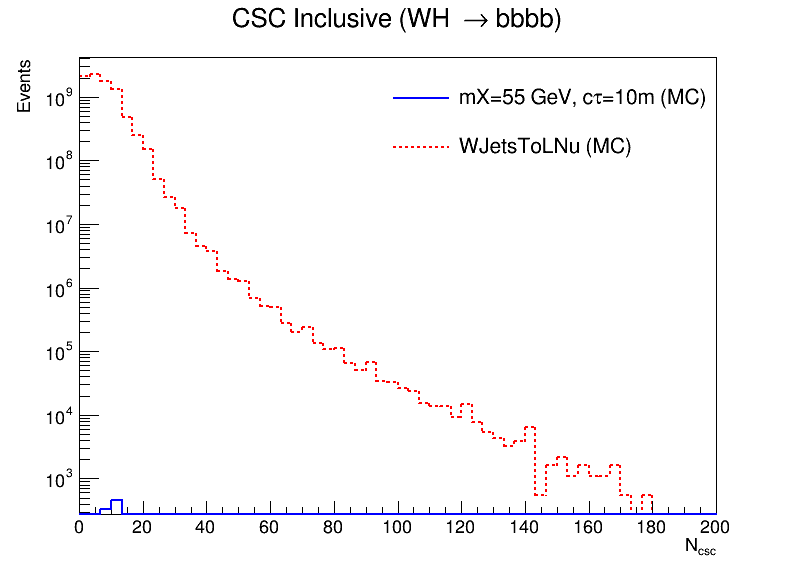

In [288]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data 
# with no hit removal

c = rt.TCanvas('c','c', 800, 600)
h = {}
# h['nCsc_m50ct1m'] = create_TH1D(nCsc['m50ct1m'], axis_title=['nCsc_m50ct1m', 'Events'], name='nCsc_m50ct1m', binning=[150,0,500])
# h['nCsc_m50ct1m'].SetLineColor(4)

h['m55ct10m_wh_bbbb'] = create_TH1D(nCsc['m55ct10m_wh_bbbb'], axis_title=['m55ct10m_wh_bbbb', 'Events'], name='m55ct10m_wh_bbbb', binning=[150,0,500], weights = weight_m55ct10m)
h['m55ct10m_wh_bbbb'].SetLineColor(4)
# h['nCsc_m50ct10m'].SetLineStyle(2)

h['nCsc_wjets'] = create_TH1D(nCsc['WJetsToLNu'], axis_title=['nCsc_wjets', 'Events'], name='nCsc_wjets', binning=[150,0,500], weights = weight_WJetsToLNu)
h['nCsc_wjets'].SetLineColor(2)
h['nCsc_wjets'].SetLineStyle(2)


# h['nCsc_zeroBias'] = create_TH1D(nCsc['zeroBias'], axis_title=['nCsc_zeroBias', 'Events'], name='nCsc_zeroBias', binning=[150,0,500])
# h['nCsc_zeroBias'].SetLineColor(2)
# h['nCsc_zeroBias'].SetLineStyle(1)

c.SetLogy()

# h['nCsc_m50ct1m'].Scale(1.0/h['nCsc_m50ct1m'].Integral())
# h['m55ct10m_wh_bbbb'].Scale(1.0/h['m55ct10m_wh_bbbb'].Integral())

# h['nCsc_wjets'].Scale(1.0/h['nCsc_wjets'].Integral())
# h['nCsc_zeroBias'].Scale(1.0/h['nCsc_zeroBias'].Integral())


# h['nCsc_m50ct1m'].SetLineWidth(1)
h['m55ct10m_wh_bbbb'].SetLineWidth(2)

h['nCsc_wjets'].SetLineWidth(2)
# h['nCsc_zeroBias'].SetLineWidth(2)

# h['nCsc_m50ct1m'].GetXaxis().SetRangeUser(0,200)
h['m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,200)

h['nCsc_wjets'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets'].SetStats(0)
h['nCsc_wjets'].SetTitle("CSC Inclusive (WH #rightarrow bbbb)")
h['nCsc_wjets'].SetXTitle("N_{csc}")


h['nCsc_wjets'].Draw('histo')
# h['nCsc_m50ct1m'].Draw('histo+same')
h['m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
# legend.SetFillStyle(0);
# legend.AddEntry( h['nCsc_m50ct1m'], "mX=50 GeV, c#tau=1m (MC)" , "L");
legend.AddEntry( h['m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias'], "Zero Bias" , "L");

legend.Draw();

c.Draw()

# c.SaveAs("ncsc_inclusive_mc_zeroBias.pdf")
# c.SaveAs("ncsc_inclusive_mc_zeroBias.C")

## *N<sub>CSC</sub> Histogram with ME 1/1 Hits Removed*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: m55ct10m_wh_bbbb_noME11 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: nCsc_wjets_noME11 (Potential memory leak).


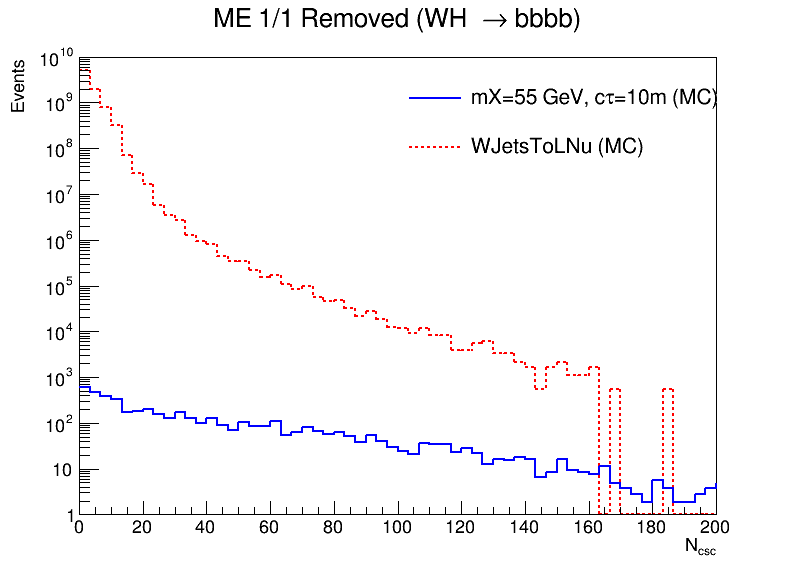

In [293]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c2 = rt.TCanvas('c2','c2', 800, 600)

h['m55ct10m_wh_bbbb_noME11'] = create_TH1D(nCsc_removal['m55ct10m_wh_bbbb']['ME_11'], axis_title=['m55ct10m_wh_bbbb_noME11', 'Events'], name='m55ct10m_wh_bbbb_noME11', binning=[150,0,500], weights=weight_m55ct10m)
h['m55ct10m_wh_bbbb_noME11'].SetLineColor(4)

h['nCsc_wjets_noME11'] = create_TH1D(nCsc_removal['WJetsToLNu']['ME_11'], axis_title=['nCsc_wjets_noME11', 'Events'], name='nCsc_wjets_noME11', binning=[150,0,500], weights=weight_WJetsToLNu)
h['nCsc_wjets_noME11'].SetLineColor(2)
h['nCsc_wjets_noME11'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c2.SetLogy()

# h['m55ct10m_wh_bbbb_noME11'].Scale(1.0/h['m55ct10m_wh_bbbb_noME11'].Integral())
# h['nCsc_wjets_noME11'].Scale(1.0/h['nCsc_wjets_noME11'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['m55ct10m_wh_bbbb_noME11'].SetLineWidth(2)
h['nCsc_wjets_noME11'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

# h['m55ct10m_wh_bbbb_noME11'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME11'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME11'].GetYaxis().SetRangeUser(1, 10**10)

# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME11'].SetStats(0)
h['nCsc_wjets_noME11'].SetTitle("ME 1/1 Removed (WH #rightarrow bbbb)")
h['nCsc_wjets_noME11'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME11'].Draw('histo')
# h['m55ct10m_wh_bbbb_noME11'].Draw('histo')
h['m55ct10m_wh_bbbb_noME11'].Draw('histo+same')

# h['nCsc_wjets_noME11'].Draw('histo+same')

# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['m55ct10m_wh_bbbb_noME11'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME11'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c2.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")

## *MET p<sub>T</sub> Distribution*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_met
Warning in <TROOT::Append>: Replacing existing TH1: MET_m55ct10m_wh_bbbb (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MET_WJetsToLNu (Potential memory leak).


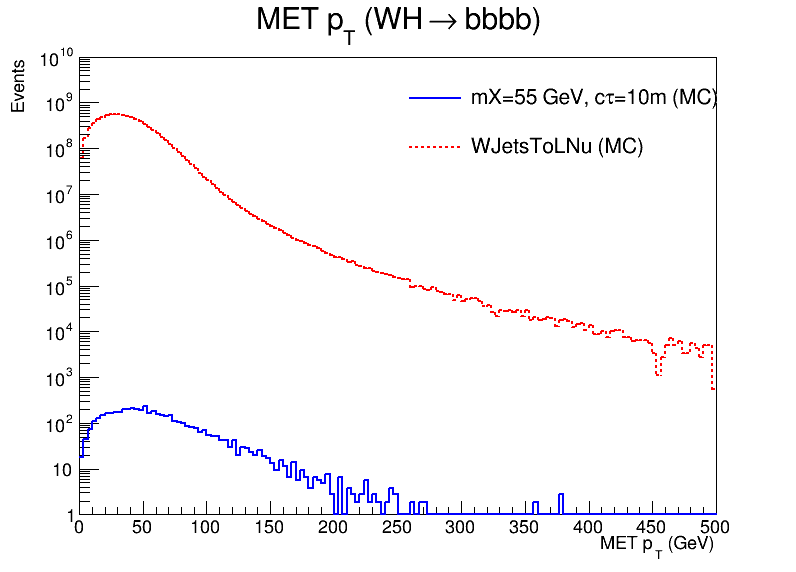

In [294]:
c_met = rt.TCanvas('c_met','c_met', 800, 600)

h['MET_m55ct10m_wh_bbbb'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'], axis_title=['MET_m55ct10m_wh_bbbb', 'Events'], name='MET_m55ct10m_wh_bbbb', binning=[150,0,500], weights=weight_m55ct10m)
h['MET_m55ct10m_wh_bbbb'].SetLineColor(4)

h['MET_WJetsToLNu'] = create_TH1D(met_pt['WJetsToLNu'], axis_title=['MET_WJetsToLNu', 'Events'], name='MET_WJetsToLNu', binning=[150,0,500], weights=weight_WJetsToLNu)
h['MET_WJetsToLNu'].SetLineColor(2)
h['MET_WJetsToLNu'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_met.SetLogy()

# h['MET_m55ct10m_wh_bbbb'].Scale(1.0/h['MET_m55ct10m_wh_bbbb'].Integral())
# h['MET_WJetsToLNu'].Scale(1.0/h['MET_WJetsToLNu'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['MET_m55ct10m_wh_bbbb'].SetLineWidth(2)
h['MET_WJetsToLNu'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['MET_m55ct10m_wh_bbbb'].GetXaxis().SetRangeUser(0,500)
h['MET_WJetsToLNu'].GetXaxis().SetRangeUser(0,500)
h['MET_WJetsToLNu'].GetYaxis().SetRangeUser(1, 10**10)


h['MET_WJetsToLNu'].SetStats(0)
h['MET_WJetsToLNu'].SetTitle("MET p_{T} (WH #rightarrow bbbb)")
h['MET_WJetsToLNu'].SetXTitle("MET p_{T} (GeV)")


h['MET_WJetsToLNu'].Draw('histo')
h['MET_m55ct10m_wh_bbbb'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['MET_m55ct10m_wh_bbbb'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['MET_WJetsToLNu'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_met.Draw()

# k-means Clustering

In [162]:
# k-means clustering algorithm
# For more information, check out https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

MAX_ITERATIONS = 100
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > MAX_ITERATIONS: return True
    return np.array_equal(oldCentroids,centroids) and iterations > 0


# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids, i):
    #print 1
    #for i in dataSet:
    dist = cdist( dataSet, centroids, metric='euclidean' )
    
    #print dist
    if i < 1:
        dist[dist>1.0] = 999
    elif i < 2:
        dist[dist>0.8] = 999
    else:
        dist[dist>0.4] = 999
        
    #print dist
    #print np.argmin(dist, axis=1)
    return np.argmin(dist, axis=1)
    #print dataSet
    # For each element in the dataset, chose the closest centroid. 
    # Make that centroid the element's label.

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmeans(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.average(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getRandomCentroids():
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    even_list = np.linspace(-4.0, 4.0, num=5)
    centers  = np.empty((0,2))
    for i in even_list:
        for j in even_list:
            #print i,j
            new_arr = np.array([i,j])
            centers = np.append(centers,[new_arr],axis=0)
    #print centers
    return centers
    #return np.mgrid[-4:4.1:2, -4:4.1:2].reshape(2,-1).T
    #return np.random.rand(k,numFeatures)

# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

####################################################################################################

# k-medians Algorithm
# -------------
# k-medians is equivalent algorithm to k-means except it calculates the median instead of the average

# Function: Get Centroids
# -------------
# Returns k centroids, each of dimension n.
def getCentroids_kmedians(dataSet, centroids, labels, k):
    #print centroids
    newcentroid = np.empty((0,2))
    new_centroid_constituents = []
    for i in range(k):
        sel = labels[:] == i
        #print i, dataSet[sel], np.count_nonzero(dataSet[sel])/2
        if np.count_nonzero(dataSet[sel]) > 0:
            #print np.average(dataSet[sel], axis=0)
            #newcentroid.append(np.average(dataSet[sel], axis=0))
            selected = [np.median(dataSet[sel], axis=0)]
            for val in selected:
                newcentroid = np.append(newcentroid,[val], axis=0)
            #newcentroid = np.append(newcentroid,np.average(dataSet[sel], axis=0), axis=0)
            new_centroid_constituents.append(np.count_nonzero(dataSet[sel])/2)
        else:
            newcentroid = np.append(newcentroid,[centroids[i]],axis=0)
            new_centroid_constituents.append(0)
    
    return newcentroid,new_centroid_constituents
    # Each centroid is the geometric median of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.

# Function: K Medians
# -------------
# K-medians is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmedians(dataSet, k):
    # Initialize centroids randomly
    numFeatures = dataSet.ndim
    centroids = getRandomCentroids()
    centroid_constituents = np.repeat(-999, 25)
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = np.empty((25,2))
    oldCentroids[:] = centroids
    #np.random.rand(1,2)
    #print centroids
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids[:] = centroids
        #print oldCentroids
        #print 'iter', iterations
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids, iterations)
        # Assign centroids based on datapoint labels
        
        centroids,centroid_constituents = getCentroids_kmeans(dataSet, oldCentroids, labels, k)
        #print centroids
        iterations += 1
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,centroid_constituents

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_cluster


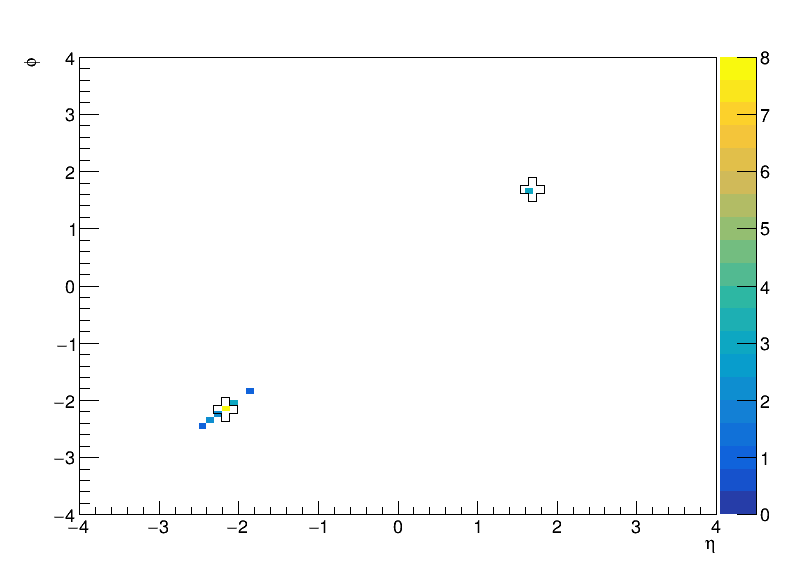

In [163]:
evt_idx = 25

c_cluster = rt.TCanvas('c_cluster','c_cluster', 800, 600)
h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_eta['m55ct10m_wh_bbbb'][evt_idx])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])

## Scrapped due to np.logical_and discovery
# Resulting implementation of eventNum
#h['eta_phi_0'] = create_TH2D(np.vstack((csc_eta_dis[event4][0],csc_phi_dis[event4][0])).T, name='eta_phi_0', title='', binning=[80, -4, 4, 80, -4, 4], weights=None, axis_title = ['#eta','#phi', ''])


c_cluster.SetLogy(0)
h['eta_phi_0'].SetStats(0)
c_cluster.cd()
#h['eta_phi_0'].SetStats(0)
h['eta_phi_0'].Draw("colz")


#test_dataset = np.vstack((csc_eta_prompt[evt_idx],csc_phi_prompt[evt_idx])).T

test_dataset = np.vstack((csc_eta['m55ct10m_wh_bbbb'][evt_idx],csc_eta['m55ct10m_wh_bbbb'][evt_idx])).T
#print(test_dataset)
#print test_dataset.ndim
#print len(csc_eta_prompt[evt_idx])
centroids_t,centroid_constituents_t = kmeans(test_dataset,25)

ll = 0
xx = []
yy = []
nn = 0
for nc in centroid_constituents_t:
    if nc > 0:
        nn += 1
        xx.append(centroids_t[ll,0])
        yy.append(centroids_t[ll,1])
    ll += 1


tg = rt.TGraph(nn)
for ii in range(nn):
    tg.SetPoint(ii,xx[ii],yy[ii])


tg.SetMarkerSize(3)
tg.SetMarkerStyle(28)
tg.Draw("P0+same")


c_cluster.Draw()

In [164]:
n_c_total = {}
n_c_hits_12 = {}
n_c_hits_13 = {}

delta_t_max_freq = {}
delta_t_max = {}

# met_pt_cluster = {}
# delta_t_average = {}

def sel_clustering(station, model): # Add (, model) for gen level info
        eta_data_sel = data_sel[station][0]
        t_data_sel = data_sel[station][1]
        z_data_sel = data_sel[station][2]
        if station == 2 or station == -2:
            x_data_sel = data_sel[station][3]
            y_data_sel = data_sel[station][4]
        else:
            x_data_sel = np.zeros(len(eta_data_sel))
            y_data_sel = np.zeros(len(eta_data_sel))
            
        test_dataset = np.vstack((eta_data_sel, t_data_sel)).T
        
        # Centroid_constituents is a list of all of the hits corresponding to each centroid
        # etaPhi_labels is a list of the centroids corresponding to each hit
        centroids, centroid_constituents = kmeans(test_dataset, 25)
#         centroids, centroid_constituents = kmedians(test_dataset, 25)
        etaPhi_labels = getLabels(test_dataset, centroids, 2)
        
#         print(centroid_constituents)
#         print(etaPhi_labels)
        
        # Determines nCsc for all clusters
        total_hits = 0
#         met_val = 0
        for cc in centroid_constituents:
            if cc > 3:
                total_hits += cc
#                 met_val += 
        
        n_c_total[data_type][station].append(total_hits)
        
        # Separates and counts hits in ME 1/2 and ME 1/3
        z_final = np.array([])
        t_final = np.array([])
        r_final_123_sel = np.array([])
        cluster_freq = np.array([])
        for cluster in np.unique(etaPhi_labels):
            if np.count_nonzero(etaPhi_labels == cluster) > 3:
                if cluster != 0:
                    z_final = np.append(z_final, z_data_sel[etaPhi_labels == cluster])
                    x_final_123_sel = x_data_sel[etaPhi_labels == cluster]
                    y_final_123_sel = y_data_sel[etaPhi_labels == cluster]
                    r_final_123_sel = np.append(r_final_123_sel, np.sqrt(x_final_123_sel**2+y_final_123_sel**2))
                    cluster_freq = np.append(cluster_freq, centroid_constituents[cluster])
                    t_final = np.append(t_final, t_data_sel[etaPhi_labels == cluster])
                

        if t_final.shape[0] == 0:
#             t_final = np.append(t_final, np.nan)
            delta_t_max[data_type][station].append(np.nan)
            delta_t_max_freq[data_type][station].append(np.nan)
            
        else:
            max_cluster_freq = np.amax(cluster_freq)
            delta_t_max_freq[data_type][station].append(max_cluster_freq)
            t_cluster = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])]
            if len(t_cluster) != 0:
                if etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])][0] != 0:
#                     max_t = np.max(t_cluster)
#                     min_t = np.min(t_cluster)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
                    
                else:
                    t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
#                     max_t = np.max(t_cluster_prime)
#                     min_t = np.min(t_cluster_prime)
                    delta_t = np.mean(t_cluster)
                    delta_t_max[data_type][station].append(delta_t)
#                     if delta_t > 1:
# #                         print(max_t)
# #                         print(min_t)
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][0])])
#                         print(etaPhi_labels[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])])
#                         print(max_cluster_freq)
#                         print(etaPhi_labels)
            else:
                t_cluster_prime = t_data_sel[np.where(etaPhi_labels == np.where(centroid_constituents == max_cluster_freq)[0][1])]
                max_t = np.max(t_cluster_prime)
                min_t = np.min(t_cluster_prime)
                delta_t = np.mean(t_cluster)
                delta_t_max[data_type][station].append(delta_t)

        
        if r_final_123_sel.shape[0] == 0:
            n_c_hits_12[data_type][station].append(0.0)
            n_c_hits_13[data_type][station].append(0.0)
        else:
            sel_counter_12 = 0
            sel_counter_13 = 0
            for hit_r in r_final_123_sel:
                if hit_r < 465 and hit_r > 275:
                    sel_counter_12 += 1
                if hit_r < 695.5 and hit_r > 505.5:
                    sel_counter_13 += 1
            n_c_hits_12[data_type][station].append(sel_counter_12)
            n_c_hits_13[data_type][station].append(sel_counter_13)
#         print(t_data_sel)
#         if t_final.shape[0] == 0:
#             delta_t_max[data_type][station].append(0.0)
#             delta_t_average[data_type][station].append(0.0)
#         else:
#             if np.absolute(np.amax(t_final)) > np.absolute(np.amin(t_final)):
#                 delta_t_max[data_type][station].append(np.amax(t_final))
#             else:
#                 delta_t_max[data_type][station].append(np.amin(t_final))
#             delta_t_average[data_type][station].append(np.sum(t_final)/len(t_final))

In [165]:
print('Start: '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
for data_type in data_trees.keys():
    n_c_total[data_type] = {}
    n_c_total[data_type]['total'] = []
    
    delta_t_max[data_type] = {}
    delta_t_max[data_type]['total'] = []
    
    delta_t_max_freq[data_type] = {}

#     delta_t_average[data_type] = {}
#     delta_t_average[data_type]['total'] = []
    
    n_c_hits_12[data_type] = {}
    n_c_hits_13[data_type] = {}

    csc_sections = [1,2,3,4,5, -1, -2, -3, -4, -5]
    for section in csc_sections:
        n_c_total[data_type][section] = []
        n_c_hits_12[data_type][section] = []
        n_c_hits_13[data_type][section] = []
        
        delta_t_max[data_type][section] = []
        delta_t_max_freq[data_type][section] = []
        
#         delta_t_average[data_type][section] = []

            
    for sel_event in range(csc_eta[data_type].shape[0]):

        data_sel = {}

        # 1/1 if 568 < zPos < 632:
        hits_pos1_sel = np.logical_and(csc_z[data_type][sel_event]<632, csc_z[data_type][sel_event]>568)
        hits_neg1_sel = np.logical_and(csc_z[data_type][sel_event]>-632, csc_z[data_type][sel_event]<-568)
        data_sel[1] = (csc_eta[data_type][sel_event][hits_pos1_sel], csc_t[data_type][sel_event][hits_pos1_sel], csc_z[data_type][sel_event][hits_pos1_sel])
        data_sel[-1] = (csc_eta[data_type][sel_event][hits_neg1_sel], csc_t[data_type][sel_event][hits_neg1_sel], csc_z[data_type][sel_event][hits_neg1_sel])


        # 1/2 and 1/3 elif 663 < zPos < 724:
        hits_pos2_sel = np.logical_and(csc_z[data_type][sel_event]<724, csc_z[data_type][sel_event]>663)
        hits_neg2_sel = np.logical_and(csc_z[data_type][sel_event]>-724, csc_z[data_type][sel_event]<-663)
        data_sel[2] = (csc_eta[data_type][sel_event][hits_pos2_sel], csc_t[data_type][sel_event][hits_pos2_sel], csc_z[data_type][sel_event][hits_pos2_sel], csc_x[data_type][sel_event][hits_pos2_sel], csc_y[data_type][sel_event][hits_pos2_sel])
        data_sel[-2] = (csc_eta[data_type][sel_event][hits_neg2_sel], csc_t[data_type][sel_event][hits_neg2_sel], csc_z[data_type][sel_event][hits_neg2_sel], csc_x[data_type][sel_event][hits_neg2_sel], csc_y[data_type][sel_event][hits_neg2_sel])


        # 2/1 and 2/2 elif 791 < zPos < 849.5:
        hits_pos3_sel = np.logical_and(csc_z[data_type][sel_event]<849.5, csc_z[data_type][sel_event]>791)
        hits_neg3_sel = np.logical_and(csc_z[data_type][sel_event]>-849.5, csc_z[data_type][sel_event]<-791)
        data_sel[3] = (csc_eta[data_type][sel_event][hits_pos3_sel], csc_t[data_type][sel_event][hits_pos3_sel], csc_z[data_type][sel_event][hits_pos3_sel])
        data_sel[-3] = (csc_eta[data_type][sel_event][hits_neg3_sel], csc_t[data_type][sel_event][hits_neg3_sel], csc_z[data_type][sel_event][hits_neg3_sel])


        # 3/1 and 3/2 elif 911.5 < zPos < 970:
        hits_pos4_sel = np.logical_and(csc_z[data_type][sel_event]<970, csc_z[data_type][sel_event]>911.5)
        hits_neg4_sel = np.logical_and(csc_z[data_type][sel_event]>-970, csc_z[data_type][sel_event]<-911.5)
        data_sel[4] = (csc_eta[data_type][sel_event][hits_pos4_sel], csc_t[data_type][sel_event][hits_pos4_sel], csc_z[data_type][sel_event][hits_pos4_sel])
        data_sel[-4] = (csc_eta[data_type][sel_event][hits_neg4_sel], csc_t[data_type][sel_event][hits_neg4_sel], csc_z[data_type][sel_event][hits_neg4_sel])


        # 4/1 and 4/2 elif 1002 < zPos < 1060.5:
        hits_pos5_sel = np.logical_and(csc_z[data_type][sel_event]<1060.5, csc_z[data_type][sel_event]>1002.5)
        hits_neg5_sel = np.logical_and(csc_z[data_type][sel_event]>-1060.5, csc_z[data_type][sel_event]<-1002.5)
        data_sel[5] = (csc_eta[data_type][sel_event][hits_pos5_sel], csc_t[data_type][sel_event][hits_pos5_sel], csc_z[data_type][sel_event][hits_pos5_sel])
        data_sel[-5] = (csc_eta[data_type][sel_event][hits_neg5_sel], csc_t[data_type][sel_event][hits_neg5_sel], csc_z[data_type][sel_event][hits_neg5_sel])

        sel_clustering(1, data_type)
        sel_clustering(-1, data_type)
        sel_clustering(2, data_type)
        sel_clustering(-2, data_type)
        sel_clustering(3, data_type)
        sel_clustering(-3, data_type)
        sel_clustering(4, data_type)
        sel_clustering(-4, data_type)
        sel_clustering(5, data_type)
        sel_clustering(-5, data_type)

        ncsc_temp = 0.0
        t_max_temp = np.array([])
        t_freq_temp = []
        
        for x in csc_sections:
            ncsc_temp += n_c_total[data_type][x][-1]
            t_freq_temp.append(delta_t_max_freq[data_type][x][-1])
            t_max_temp = np.append(t_max_temp, delta_t_max[data_type][x][-1])


        n_c_total[data_type]['total'].append(ncsc_temp)
        
        if len(t_freq_temp) == len(csc_sections):
            t_freq_temp = np.nan_to_num(t_freq_temp).astype(int)
            max_freq = np.amax(t_freq_temp)
            max_freq_index = np.where(t_freq_temp == max_freq)
#             print(t_max_temp[max_freq_index][0])
#             if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                 max_delT = np.amax(t_max_temp[max_freq_index])
#             else:
#                 max_delT = np.amin(t_max_temp[max_freq_index])
                
            delta_t_max[data_type]['total'].append(t_max_temp[max_freq_index][0])
            
#             if len((t_max_temp[max_freq_index])) != len(csc_sections):
#                 if np.absolute(np.amax(t_max_temp[max_freq_index])) > np.absolute(np.amin(t_max_temp[max_freq_index])):
#                     max_delPhi = np.amax(t_max_temp[max_freq_index])
#                 else:
#                     max_delPhi = np.amin(t_max_temp[max_freq_index])
#                 delta_t_max[data_type]['total'].append(max_delPhi)
#             else:
#                 delta_t_max[data_type]['total'].append(np.nan)
        else:
            print("Function error")
                
        if (sel_event % 1000) == 0:
            print(str(sel_event) + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))
        
        # 310000
        if sel_event > 40000:
            break
            
#         if np.absolute(np.amax(t_avg_temp)) > np.absolute(np.amin(t_avg_temp)):
#             delta_t_max[data_type]['total'].append(np.amax(t_avg_temp))
#         else:
#             delta_t_max[data_type]['total'].append(np.amin(t_avg_temp))
            
#         delta_t_average[data_type]['total'].append(np.sum(t_avg_temp)/len(t_avg_temp))        
#         break
        
    print(data_type + ': '+  str(datetime.datetime.now(pytz.timezone('US/Pacific'))))

Start: 2019-08-05 17:00:28.346331-07:00
0: 2019-08-05 17:00:28.360678-07:00
m15ct10m_wh_bbbb: 2019-08-05 17:00:39.894794-07:00
0: 2019-08-05 17:00:39.905422-07:00
1000: 2019-08-05 17:00:51.998910-07:00
2000: 2019-08-05 17:01:03.959478-07:00
m40ct10m_wh_bbbb: 2019-08-05 17:01:05.712252-07:00
0: 2019-08-05 17:01:05.728757-07:00
1000: 2019-08-05 17:01:17.514576-07:00
2000: 2019-08-05 17:01:43.723712-07:00
m55ct10m_wh_bbbb: 2019-08-05 17:01:56.435863-07:00
0: 2019-08-05 17:01:56.446584-07:00
1000: 2019-08-05 17:02:07.321960-07:00
2000: 2019-08-05 17:02:17.336667-07:00
3000: 2019-08-05 17:02:27.283683-07:00
4000: 2019-08-05 17:02:37.240726-07:00
5000: 2019-08-05 17:02:47.185277-07:00
6000: 2019-08-05 17:02:57.131806-07:00
7000: 2019-08-05 17:03:07.114369-07:00
8000: 2019-08-05 17:03:17.107518-07:00
9000: 2019-08-05 17:03:27.152742-07:00
10000: 2019-08-05 17:03:37.052979-07:00
11000: 2019-08-05 17:03:46.977590-07:00
12000: 2019-08-05 17:03:58.313483-07:00
13000: 2019-08-05 17:04:08.278147-07

In [166]:
print(np.count_nonzero(n_c_total['m55ct10m_wh_bbbb']['total']))
print(len(n_c_total['m55ct10m_wh_bbbb']['total']))

2084
2594


In [167]:
nCsc_cluster = {}
for data_type in data_trees.keys():
    nCsc_cluster[data_type] = {}
    nCsc_cluster[data_type]['csc_inclusive'] = np.array(n_c_total[data_type]['total'])
    nCsc_cluster[data_type]['csc_noME11'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]))
    nCsc_cluster[data_type]['csc_noME112'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_hits_12[data_type][2]) + np.array(n_c_hits_12[data_type][-2]))
    nCsc_cluster[data_type]['csc_noME1123'] = np.array(n_c_total[data_type]['total']) - (np.array(n_c_total[data_type][1]) + np.array(n_c_total[data_type][-1]) + np.array(n_c_total[data_type][2]) + np.array(n_c_total[data_type][-2]))

In [168]:
# ROC Curve for ggH/QCD/ZeroBias Samples: nCsc 

eff_ncsc = {}
rejection_power = {}
ncsc_var_x = np.array([])

for data_type in data_trees.keys():
    eff_ncsc[data_type] = {}
    
    eff_ncsc[data_type]['cluster'] = {}
    eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.array([])
    
    eff_ncsc[data_type]['noCluster'] = {}
    eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.array([])
    eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.array([])
    
    for hit_thresh in range(0, 200):
        ncsc_var_x = np.append(ncsc_var_x, hit_thresh)
        # Clustering ROCs
        eff_ncsc[data_type]['cluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['cluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_inclusive'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_inclusive']))
        eff_ncsc[data_type]['cluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME11'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME11']))
        eff_ncsc[data_type]['cluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME112'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME112']))
        eff_ncsc[data_type]['cluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['cluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_cluster[data_type]['csc_noME1123'])>hit_thresh)/len(nCsc_cluster[data_type]['csc_noME1123']))

       # No-Clustering ROCs
        eff_ncsc[data_type]['noCluster']['csc_inclusive'] = np.append(eff_ncsc[data_type]['noCluster']['csc_inclusive'], np.count_nonzero(np.array(nCsc[data_type])>hit_thresh)/len(nCsc[data_type]))
        eff_ncsc[data_type]['noCluster']['csc_noME11'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME11'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_11'])>hit_thresh)/len(nCsc_removal[data_type]['ME_11']))
        eff_ncsc[data_type]['noCluster']['csc_noME112'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME112'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_112'])>hit_thresh)/len(nCsc_removal[data_type]['ME_112']))
        eff_ncsc[data_type]['noCluster']['csc_noME1123'] = np.append(eff_ncsc[data_type]['noCluster']['csc_noME1123'], np.count_nonzero(np.array(nCsc_removal[data_type]['ME_1123'])>hit_thresh)/len(nCsc_removal[data_type]['ME_1123']))
    
    # Rejection power calculation
    rejection_power[data_type] = {}
    rejection_power[data_type]['cluster'] = {}
    rejection_power[data_type]['noCluster'] = {}
    
    # Clustering
    rejection_power[data_type]['cluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_inclusive']))
    rejection_power[data_type]['cluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME11']))
    rejection_power[data_type]['cluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME112']))
    rejection_power[data_type]['cluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['cluster']['csc_noME1123']))
    # No clustering
    rejection_power[data_type]['noCluster']['csc_inclusive'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_inclusive']))
    rejection_power[data_type]['noCluster']['csc_noME11'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME11']))
    rejection_power[data_type]['noCluster']['csc_noME112'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME112']))
    rejection_power[data_type]['noCluster']['csc_noME1123'] = np.reciprocal(np.trim_zeros(eff_ncsc[data_type]['noCluster']['csc_noME1123']))

## *N<sub>CSC</sub> Threshold ROC Curves*

length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


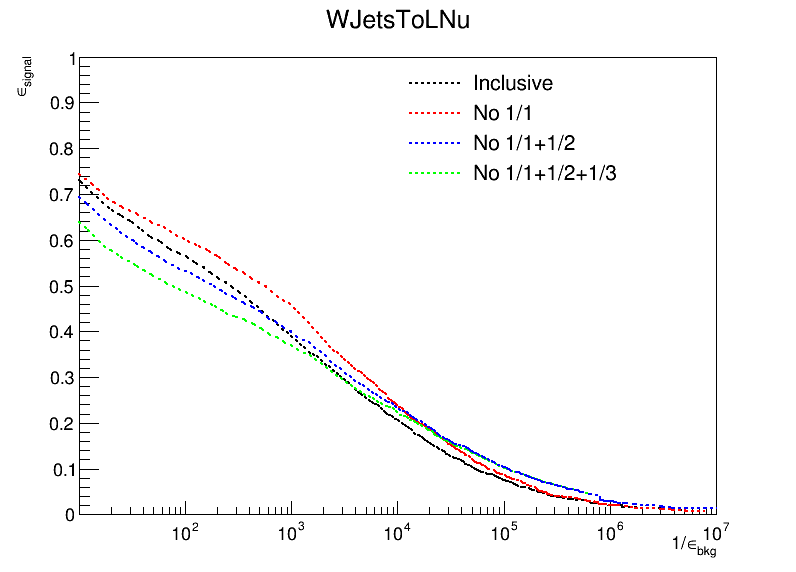

In [169]:
# Creates ROC curves for the signal efficiency of the m50ct1m signal sample against the ZeroBias samples
# using nCsc thresholds

c3 = rt.TCanvas('c3','c3', 800, 600)

h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c3.SetLogx()

h['roc_curve_noCluster'].SetTitle('WJetsToLNu')


h['roc_curve_noCluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 10000000)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)

h['roc_curve_noCluster'].Draw()
h['roc_curve_clean_noCluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Inclusive", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "No 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "No 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "No 1/1+1/2+1/3", 'l');


legend.Draw();

c3.Draw()

length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!
length of x and y are not equal!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Warning in <TLegend::Paint>: Legend to large to be automatically placed. A default position is used


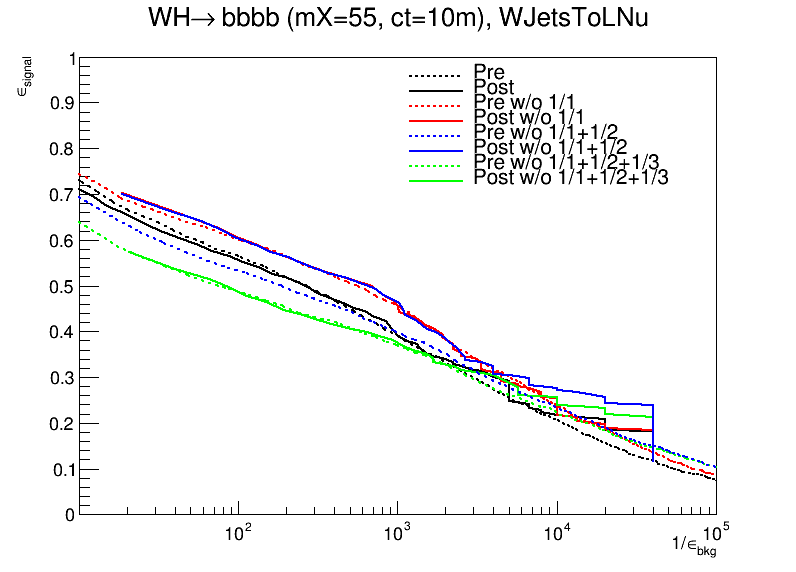

In [170]:
c4 = rt.TCanvas('c4','c4', 800, 600)

h['roc_curve_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_inclusive'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_inclusive'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_clean_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_clean_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME11'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME11'], axis_title=['#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_res_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_res_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME1123'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME1123'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

h['roc_curve_med_cluster'] = create_TGraph(rejection_power['WJetsToLNu']['cluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['cluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])
h['roc_curve_med_noCluster'] = create_TGraph(rejection_power['WJetsToLNu']['noCluster']['csc_noME112'], eff_ncsc['m55ct10m_wh_bbbb']['noCluster']['csc_noME112'], axis_title=['1/#epsilon_{bkg}', '#epsilon_{signal}'])

c4.SetLogx()
# c3.SetLogy()

h['roc_curve_noCluster'].SetTitle('WH#rightarrow bbbb (mX=55, ct=10m), WJetsToLNu')

h['roc_curve_cluster'].SetLineWidth(2)
h['roc_curve_noCluster'].SetLineWidth(2)

h['roc_curve_clean_cluster'].SetLineWidth(2)
h['roc_curve_clean_noCluster'].SetLineWidth(2)

h['roc_curve_res_cluster'].SetLineWidth(2)
h['roc_curve_res_noCluster'].SetLineWidth(2)

h['roc_curve_med_cluster'].SetLineWidth(2)
h['roc_curve_med_noCluster'].SetLineWidth(2)

h['roc_curve_cluster'].SetLineColor(1)
h['roc_curve_cluster'].SetLineStyle(1)
h['roc_curve_noCluster'].SetLineColor(1)
h['roc_curve_noCluster'].SetLineStyle(2)

h['roc_curve_clean_cluster'].SetLineColor(2)
h['roc_curve_clean_cluster'].SetLineStyle(1)
h['roc_curve_clean_noCluster'].SetLineColor(2)
h['roc_curve_clean_noCluster'].SetLineStyle(2)
                                          
h['roc_curve_res_cluster'].SetLineColor(3)
h['roc_curve_res_cluster'].SetLineStyle(1)
h['roc_curve_res_noCluster'].SetLineColor(3)
h['roc_curve_res_noCluster'].SetLineStyle(2)

h['roc_curve_med_cluster'].SetLineColor(4)
h['roc_curve_med_cluster'].SetLineStyle(1)
h['roc_curve_med_noCluster'].SetLineColor(4)
h['roc_curve_med_noCluster'].SetLineStyle(2)

h['roc_curve_noCluster'].GetXaxis().SetLimits(10, 100000)
h['roc_curve_noCluster'].GetYaxis().SetRangeUser(0,1)



h['roc_curve_noCluster'].Draw()
h['roc_curve_cluster'].Draw('same')
h['roc_curve_clean_cluster'].Draw('same')
h['roc_curve_clean_noCluster'].Draw('same')
h['roc_curve_res_cluster'].Draw('same')
h['roc_curve_med_cluster'].Draw('same')

h['roc_curve_res_noCluster'].Draw('same')
h['roc_curve_med_noCluster'].Draw('same')

legend = rt.TLegend(0.70,0.70,0.7,0.7);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
legend.SetFillStyle(0);

legend.AddEntry( h['roc_curve_noCluster'], "Pre", 'l');
legend.AddEntry( h['roc_curve_cluster'], "Post", 'l');
legend.AddEntry( h['roc_curve_clean_noCluster'], "Pre w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_clean_cluster'], "Post w/o 1/1", 'l');
legend.AddEntry( h['roc_curve_med_noCluster'], "Pre w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_med_cluster'], "Post w/o 1/1+1/2", 'l');
legend.AddEntry( h['roc_curve_res_noCluster'], "Pre w/o 1/1+1/2+1/3", 'l');
legend.AddEntry( h['roc_curve_res_cluster'], "Post w/o 1/1+1/2+1/3", 'l');


legend.Draw();

c4.Draw()

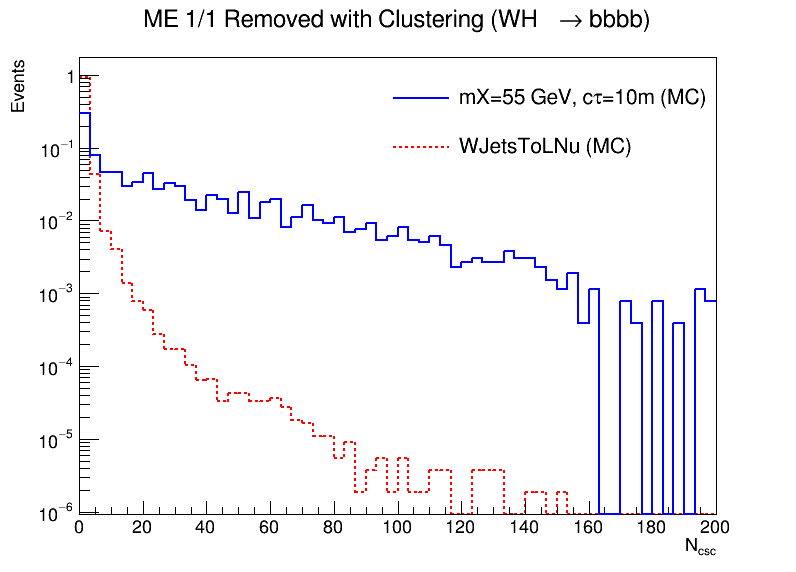

In [118]:
# Creates a 1D histogram of the number of CSC hits for the m50ct1m signal MC, QCD MC, and ZeroBias data
# after removing hits in ME 1/1

c5 = rt.TCanvas('c5','c5', 800, 600)

h['m55ct10m_wh_bbbb_noME11_cluster'] = create_TH1D(nCsc_cluster['m55ct10m_wh_bbbb']['csc_noME11'], axis_title=['m55ct10m_wh_bbbb_noME11_cluster', 'Events'], name='m55ct10m_wh_bbbb_noME11_cluster', binning=[150,0,500])
h['m55ct10m_wh_bbbb_noME11_cluster'].SetLineColor(4)

h['nCsc_wjets_noME11_cluster'] = create_TH1D(nCsc_cluster['WJetsToLNu']['csc_noME11'], axis_title=['nCsc_wjets_noME11_cluster', 'Events'], name='nCsc_wjets_noME11_cluster', binning=[150,0,500])
h['nCsc_wjets_noME11_cluster'].SetLineColor(2)
h['nCsc_wjets_noME11_cluster'].SetLineStyle(2)

c5.SetLogy()

h['m55ct10m_wh_bbbb_noME11_cluster'].Scale(1.0/h['m55ct10m_wh_bbbb_noME11_cluster'].Integral())
h['nCsc_wjets_noME11_cluster'].Scale(1.0/h['nCsc_wjets_noME11_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['m55ct10m_wh_bbbb_noME11_cluster'].SetLineWidth(2)
h['nCsc_wjets_noME11_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['m55ct10m_wh_bbbb_noME11_cluster'].GetXaxis().SetRangeUser(0,200)
h['nCsc_wjets_noME11_cluster'].GetXaxis().SetRangeUser(0,200)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['nCsc_wjets_noME11_cluster'].SetStats(0)
h['nCsc_wjets_noME11_cluster'].SetTitle("ME 1/1 Removed with Clustering (WH #rightarrow bbbb)")
h['nCsc_wjets_noME11_cluster'].SetXTitle("N_{csc}")


h['nCsc_wjets_noME11_cluster'].Draw('histo')
h['m55ct10m_wh_bbbb_noME11_cluster'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.48,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['m55ct10m_wh_bbbb_noME11_cluster'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['nCsc_wjets_noME11_cluster'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c5.Draw()

# c2.SaveAs("ncsc_noME11_mc_zeroBias.pdf")
# c2.SaveAs("ncsc_noME11_mc_zeroBias.C")

In [136]:
sel_cluster = {}
for data_type in data_trees.keys():
    sel_cluster[data_type] = np.array(n_c_total[data_type]['total'], dtype=bool)
print(len(nCsc['m40ct10m_wh_bbbb']))
print(len(n_c_total['m40ct10m_wh_bbbb']['total']))
print(sel_cluster['m55ct10m_wh_bbbb'])
print(met_pt['WJetsToLNu'][sel_cluster['WJetsToLNu']])

2146
2146
[ True  True  True ...  True  True False]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1809594 but corresponding boolean dimension is 545875

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_met_cluster
Warning in <TROOT::Append>: Replacing existing TH1: MET_m55ct10m_wh_bbbb_cluster (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MET_WJetsToLNu_cluster (Potential memory leak).


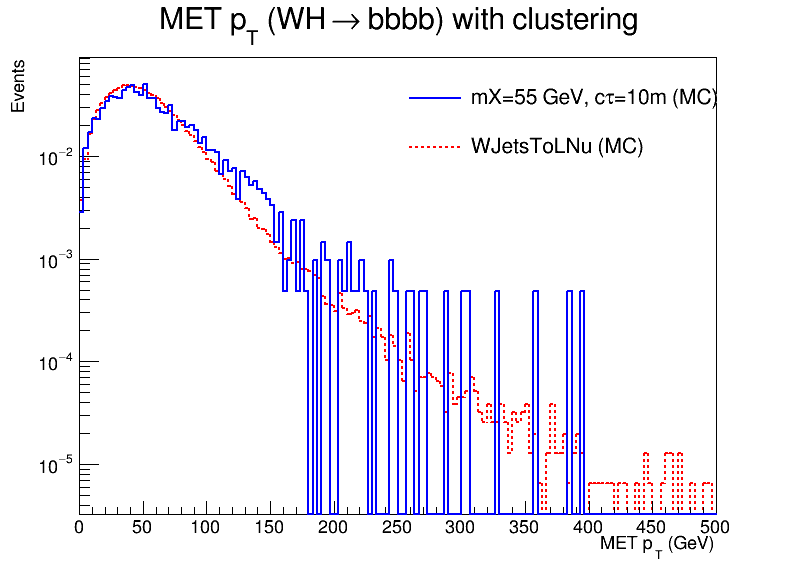

In [141]:
c_met_cluster = rt.TCanvas('c_met_cluster','c_met_cluster', 800, 600)

h['MET_m55ct10m_wh_bbbb_cluster'] = create_TH1D(met_pt['m55ct10m_wh_bbbb'][sel_cluster['m55ct10m_wh_bbbb']], axis_title=['MET_m55ct10m_wh_bbbb_cluster', 'Events'], name='MET_m55ct10m_wh_bbbb_cluster', binning=[150,0,500])
h['MET_m55ct10m_wh_bbbb_cluster'].SetLineColor(4)

h['MET_WJetsToLNu_cluster'] = create_TH1D(met_pt['WJetsToLNu'][:len(sel_cluster['WJetsToLNu'])][sel_cluster['WJetsToLNu']], axis_title=['MET_WJetsToLNu_cluster', 'Events'], name='MET_WJetsToLNu_cluster', binning=[150,0,500])
h['MET_WJetsToLNu_cluster'].SetLineColor(2)
h['MET_WJetsToLNu_cluster'].SetLineStyle(2)


# h['nCsc_zeroBias_noME11'] = create_TH1D(nCsc_removal['zeroBias']['ME_11'], axis_title=['nCsc_zeroBias_noME11', 'Events'], name='nCsc_zeroBias_noME11', binning=[150,0,500])
# h['nCsc_zeroBias_noME11'].SetLineColor(2)
# h['nCsc_zeroBias_noME11'].SetLineStyle(1)

c_met_cluster.SetLogy()

h['MET_m55ct10m_wh_bbbb_cluster'].Scale(1.0/h['MET_m55ct10m_wh_bbbb_cluster'].Integral())
h['MET_WJetsToLNu_cluster'].Scale(1.0/h['MET_WJetsToLNu_cluster'].Integral())
# h['nCsc_zeroBias_noME11'].Scale(1.0/h['nCsc_zeroBias_noME11'].Integral())


h['MET_m55ct10m_wh_bbbb_cluster'].SetLineWidth(2)
h['MET_WJetsToLNu_cluster'].SetLineWidth(2)
# h['nCsc_zeroBias_noME11'].SetLineWidth(2)

h['MET_m55ct10m_wh_bbbb_cluster'].GetXaxis().SetRangeUser(0,500)
h['MET_WJetsToLNu_cluster'].GetXaxis().SetRangeUser(0,500)
# h['nCsc_zeroBias_noME11'].GetXaxis().SetRangeUser(0,200)


h['MET_WJetsToLNu_cluster'].SetStats(0)
h['MET_WJetsToLNu_cluster'].SetTitle("MET p_{T} (WH #rightarrow bbbb) with clustering")
h['MET_WJetsToLNu_cluster'].SetXTitle("MET p_{T} (GeV)")


h['MET_WJetsToLNu_cluster'].Draw('histo')
h['MET_m55ct10m_wh_bbbb_cluster'].Draw('histo+same')
# h['nCsc_zeroBias_noME11'].Draw('histo+same')

legend = rt.TLegend(0.50,0.70,0.87,0.87);
legend.SetTextSize(0.04);
legend.SetBorderSize(0);
#legend-.SetFillStyle(0);
legend.AddEntry( h['MET_m55ct10m_wh_bbbb_cluster'], "mX=55 GeV, c#tau=10m (MC)" , "L");
legend.AddEntry( h['MET_WJetsToLNu_cluster'], "WJetsToLNu (MC)" , "L");
# legend.AddEntry( h['nCsc_zeroBias_noME11'], "Zero Bias" , "L");

legend.Draw();

c_met_cluster.Draw()